## Model and Config Setup

In [1]:
import sys
import os

# Add the project's root directory to the Python path
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_vision_completion, get_image_generation_completion, get_completion, save_artifact, clean_llm_output, recommended_models_table
from IPython.display import Image, display, Code

image_client, image_model_name, image_api_provider = setup_llm_client(model_name="gemini-2.5-flash-image-preview")
print(f"✅ Using {image_model_name} for image generation")

# Ensure you select a vision-capable model
vision_client, vision_model_name, vision_api_provider = setup_llm_client(model_name="gemini-2.5-pro")
print(f"✅ Using {vision_model_name} for vision tasks")


if not image_model_name or not vision_model_name:
    print("Could not set up a valid LLM client. Please check your .env file and utils.py configuration.")

2025-11-05 16:38:40,398 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash-image-preview latency_ms=None artifacts_path=None
2025-11-05 16:38:40,411 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-pro latency_ms=None artifacts_path=None


✅ Using gemini-2.5-flash-image-preview for image generation
✅ Using gemini-2.5-pro for vision tasks


## Get the Desired UI Screenshot for View

Using gemini-2.5-flash-image-preview for image generation...
✅ Generated image saved to: /Users/brianfisher/trainingRepos/220372-AG-AISOFTDEV-Team-1-AINavigators/artifacts/screens/image_1762379682.png



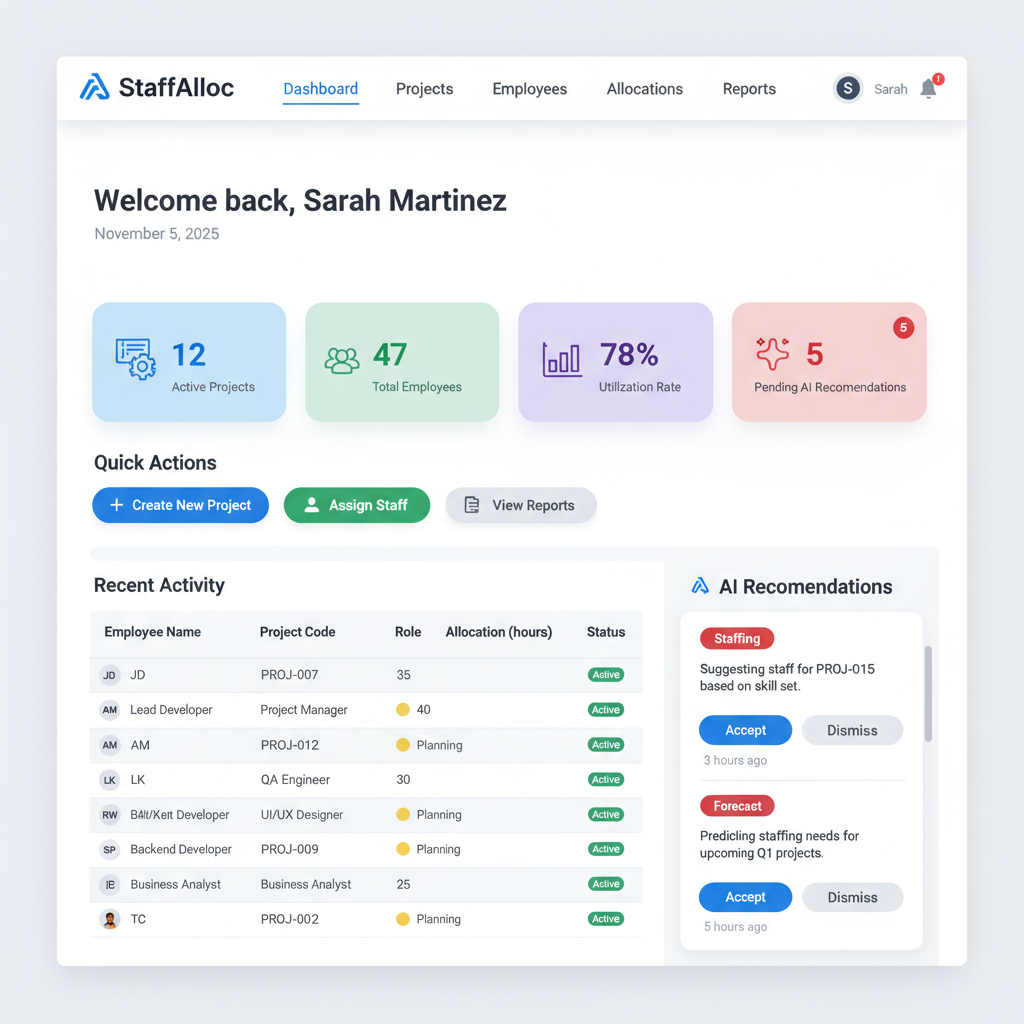

In [24]:
# VIEW 1: Dashboard
# This generates the main dashboard view with metrics, quick actions, and AI recommendations

screen_generation_prompt = """
Create a modern, professional dashboard UI for a staff allocation management platform called "StaffAlloc". 

The dashboard should include:

**Header Section:**
- Top navigation bar with the "StaffAlloc" logo on the left (use a simple text logo with an icon)
- Navigation menu items: Dashboard (active), Projects, Employees, Allocations, Reports
- User profile icon and notifications bell on the right
- Clean, modern design with a subtle shadow below the header

**Main Content Area:**
- Welcome message "Welcome back, Sarah Martinez" with current date "November 5, 2025"
- 4 metric cards in a 2x2 grid showing:
  * Active Projects: 12 (with project icon)
  * Total Employees: 47 (with users icon)
  * Utilization Rate: 78% (with chart icon)
  * Pending AI Recommendations: 5 (with AI sparkle icon and red notification badge)
- Each card should have: icon in color, large number, label, and subtle background color with shadow

**Quick Actions Section:**
- "Quick Actions" heading
- 3 action buttons in a horizontal row:
  * "Create New Project" (blue/primary with + icon)
  * "Assign Staff" (green with user-plus icon)
  * "View Reports" (gray/secondary with document icon)

**Recent Activity Section (Left Side, ~60% width):**
- "Recent Activity" heading
- Table showing recent project assignments with columns:
  * Employee Name (with small avatar circle)
  * Project Code
  * Role
  * Allocation (hours)
  * Status (colored badge: Active=green, Planning=yellow)
- 5-6 rows of realistic sample data
- Clean table styling with alternating row backgrounds

**AI Recommendations Panel (Right Sidebar, ~40% width):**
- "AI Recommendations" heading with a small AI sparkle icon
- 3 recommendation cards, each showing:
  * Type badge (Staffing=blue, Conflict=red, Forecast=purple)
  * Brief text description (2 lines)
  * Two small buttons: "Accept" (blue) and "Dismiss" (gray outline)
  * Small timestamp text "2 hours ago"
- Cards stacked vertically with spacing

**Design Style:**
- Modern, clean interface with plenty of white space
- Professional color scheme: primary blue (#3B82F6), success green (#10B981), subtle grays (#F3F4F6 backgrounds)
- Card-based layout with subtle shadows (shadow-sm)
- Rounded corners on all cards and buttons (rounded-lg)
- Clear typography hierarchy: headings bold, body text regular
- Responsive grid layout
- Professional SaaS application aesthetic
- Icons should be simple line icons or outlined style

**Overall Layout:**
- Full-width header at top
- Main content below with padding
- Metric cards in full-width grid
- Quick actions below metrics
- Two-column layout for Recent Activity (left) and AI Recommendations (right)

Make it look like a polished, production-ready enterprise SaaS application with modern design trends (circa 2024-2025).
"""

print(f"Using {image_model_name} for image generation...")
file_path, image_url = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

# Display the generated image if successful
if file_path and image_url:
    print(f"✅ Generated image saved to: {file_path}")
    display(Image(url=image_url))
elif image_url:
    print(f"❌ Image generation failed: {image_url}")
else:
    print("❌ Image generation returned no result")

## Generate Monolithic UI Code

First, generate an explanation of the image to pass to the model

In [25]:
image_path = file_path

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <LoginForm> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    # Save the explanation for later reference (organized by view)
    save_artifact(cleaned_explanation, "dashboard_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/dashboard_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

--- Requesting image explanation from vision model ---


Of course. Here is a detailed breakdown of the provided UI for a developer.

---

### 1) Summary

This screen is a dashboard for a staff allocation application, providing a high-level overview of key metrics, recent activities, and actionable AI-driven recommendations.

### 2) Visual Breakdown

The UI is organized into a main content area with a persistent header.

*   **Top Header:** A full-width, sticky header.
    *   **Top-Left:** Application Logo ("StaffAlloc" text and a geometric icon).
    *   **Top-Center:** Primary Navigation links: "Dashboard", "Projects", "Employees", "Allocations", "Reports". "Dashboard" is the active page.
    *   **Top-Right:** User profile section (circular avatar with initial "S", name "Sarah") and a notification bell icon with a red badge indicating one new notification.

*   **Page Content (Main Area):** Housed in a container with a light gray background.
    *   **Welcome Message (Top):** A large heading "Welcome back, Sarah Martinez" and a smaller date "November 5, 2025" below it.
    *   **Stats Cards (Upper Section):** A horizontally aligned group of four summary cards.
        1.  **Active Projects:** Blue icon, number "12".
        2.  **Total Employees:** Green icon, number "47".
        3.  **Utilization Rate:** Purple icon, number "78%".
        4.  **Pending AI Recommendations:** Red icon, number "5", with a small red notification badge on the card itself.
    *   **Quick Actions (Middle Section):** A section title and three action buttons.
        1.  `+ Create New Project` (Primary action, blue).
        2.  `Assign Staff` (Secondary action, green).
        3.  `View Reports` (Tertiary action, light gray).
    *   **Main Content Grid (Bottom Section):** A two-column layout.
        *   **Left Column (Wider): Recent Activity**
            *   A section title "Recent Activity".
            *   A data table or list with a header row: `Employee Name`, `Project Code`, `Role`, `Allocation (hours)`, `Status`.
            *   Data rows, each containing an avatar (initials or photo), name, project code, role (sometimes with a status dot), hours, and a status "pill".
        *   **Right Column (Narrower): AI Recommendations**
            *   A section title "AI Recommendations" with an icon.
            *   A vertically stacked list of recommendation cards inside a container that appears to be scrollable.
            *   Each card contains: a category tag (e.g., "Staffing", "Forecast"), a description, "Accept" and "Dismiss" buttons, and a relative timestamp (e.g., "3 hours ago").

### 3) Style Details

*   **Colors:**
    *   **Background:** Off-white/very light gray (`#F7F8FA`).
    *   **Panel/Card Background:** Pure white (`#FFFFFF`).
    *   **Primary Blue:** `#3B82F6` (approx.) for active links, primary buttons, and the "Active Projects" card.
    *   **Secondary Green:** `#10B981` (approx.) for "Assign Staff" button, "Active" status pills, and the "Total Employees" card.
    *   **Accent Purple:** `#8B5CF6` (approx.) for the "Utilization" card.
    *   **Accent Red/Pink:** `#EF4444` (approx.) for notifications and the "Pending Recommendations" card.
    *   **Text (Primary):** Dark charcoal/almost black (`#1F2937`).
    *   **Text (Secondary):** Medium gray (`#6B7280`) for sub-headings, labels, and inactive nav links.
    *   **Borders/Dividers:** Very light gray (`#E5E7EB`).

*   **Typography:**
    *   **Font:** A clean, modern sans-serif font (like Inter or Manrope).
    *   **Welcome Heading:** Large, bold (approx. `30px`, `font-bold`).
    *   **Section Headings:** Medium, semi-bold (approx. `20px`, `font-semibold`).
    *   **Stat Card Numbers:** Extra large, bold (approx. `36px-42px`, `font-bold`).
    *   **Body/Table Text:** Regular weight, standard size (approx. `14px`, `font-normal`).

*   **Spacing & Layout:**
    *   The main content area has significant horizontal and vertical padding.
    *   There is consistent spacing (gap) between the stat cards, action buttons, and 

✅ Saved explanation to artifacts/dashboard_image_explanation.md


Now, generate the monolithic front-end code for the generated view

In [26]:
from utils import load_artifact

# Load the image explanation generated in the previous step
image_explanation = load_artifact("dashboard_image_explanation.md")

generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function DashboardView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    # Save the monolithic code
    save_artifact(cleaned_code, "dashboard_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/dashboard_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

--- Generating Monolithic UI Component ---


import React from 'react';
import { Bell, Briefcase, Users, BarChart3, Wand2, Plus, UserPlus, FileText, Bot, Dot } from 'lucide-react';

const LogoIcon = () => (
  <svg width="32" height="32" viewBox="0 0 32 32" fill="none" xmlns="http://www.w3.org/2000/svg">
    <path d="M16 0L32 9.23761V27.7128L16 32L0 27.7128V9.23761L16 0Z" fill="#3B82F6"/>
    <path d="M16 12.9221L27.7128 6.92309V21.0769L16 25.0779L4.28711 21.0769V6.92309L16 12.9221Z" fill="white" fillOpacity="0.5"/>
    <path d="M16 4.61884L29.8564 12.9231L16 21.2274L2.14355 12.9231L16 4.61884Z" fill="white"/>
  </svg>
);

const UserAvatar = ({ initials, className, src }) => (
  src ? <img src={src} alt="User Avatar" className={`w-8 h-8 rounded-full ${className}`} /> :
  <div className={`flex items-center justify-center w-8 h-8 rounded-full text-xs font-bold text-gray-600 bg-gray-200 ${className}`}>
    {initials}
  </div>
);

export default function StaffAllocDashboard() {
  const recentActivity = [
    { initials: 'JD', name: 'JD', project: 'PROJ-007', role: '...', allocation: 35, status: 'Active', avatarUrl: null },
    { initials: 'AM', name: 'Lead Developer', project: 'Project Manager', role: 'Active', allocation: 40, status: 'Active', avatarUrl: null },
    { initials: 'AM', name: 'AM', project: 'PROJ-012', role: 'Planning', allocation: null, status: 'Active', avatarUrl: null },
    { initials: 'LK', name: 'LK', project: 'QA Engineer', role: '...', allocation: 30, status: 'Active', avatarUrl: null },
    { initials: 'RW', name: 'Bàll/Kèit Developer', project: 'UI/UX Designer', role: 'Planning', allocation: null, status: 'Active', avatarUrl: null },
    { initials: 'SP', name: 'Backend Developer', project: 'PROJ-009', role: 'Planning', allocation: null, status: 'Active', avatarUrl: null },
    { initials: 'IE', name: 'Business Analyst', project: '...', role: '...', allocation: 25, status: 'Active', avatarUrl: null },
    { initials: 'TC', name: 'TC', project: 'PROJ-002', role: 'Planning', allocation: null, status: 'Active', avatarUrl: "https://i.pravatar.cc/32?u=tc" },
  ];

  const aiRecommendations = [
    {
      category: 'Staffing',
      description: 'Suggesting staff for PROJ-015 based on skill set.',
      time: '3 hours ago',
      color: 'red'
    },
    {
      category: 'Forecast',
      description: 'Predicting staffing needs for upcoming Q1 projects.',
      time: '5 hours ago',
      color: 'red'
    },
     {
      category: 'Optimization',
      description: 'Reallocate underutilized staff from PROJ-004 to PROJ-011.',
      time: '1 day ago',
      color: 'purple'
    }
  ];

  return (
    <div className="bg-gray-50 min-h-screen font-sans">
      <header className="bg-white shadow-sm sticky top-0 z-10">
        <div className="max-w-screen-2xl mx-auto px-4 sm:px-6 lg:px-8">
          <div className="flex items-center justify-between h-16">
            <div className="flex items-center gap-8">
              <div className="flex items-center gap-2">
                <LogoIcon />
                <span className="text-xl font-bold text-gray-800">StaffAlloc</span>
              </div>
              <nav className="hidden md:flex items-center space-x-6">
                <a href="#" className="text-sm font-semibold text-blue-600 border-b-2 border-blue-600 pb-1">Dashboard</a>
                <a href="#" className="text-sm font-medium text-gray-500 hover:text-gray-800">Projects</a>
                <a href="#" className="text-sm font-medium text-gray-500 hover:text-gray-800">Employees</a>
                <a href="#" className="text-sm font-medium text-gray-500 hover:text-gray-800">Allocations</a>
                <a href="#" className="text-sm font-medium text-gray-500 hover:text-gray-800">Reports</a>
              </nav>
            </div>
            <div className="flex items-center gap-4">
              <div className="relative">
                <Bell className="h-6 w-6 text-gray-500 hover:text-gray-700" />
                <span className="absolute -top-1 -

✅ Saved monolithic code to artifacts/dashboard_monolithic.jsx


## Refactor in Reusable Components

In [27]:
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., buttons, cards, icons) into reusable components
   - Separate layout sections (e.g., header, footer, main content) into dedicated components
   - Create styled button components, navigation components, card components, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<Header>`, `<MetricCard>`, `<ActionButton>`, `<RecommendationCard>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    # Save the refactored code
    save_artifact(cleaned_refactored_code, "dashboard_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/dashboard_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


import React, { ReactNode } from 'react';
import { Bell, Briefcase, Users, BarChart3, Wand2, Plus, UserPlus, FileText, Bot } from 'lucide-react';

// --- TYPE DEFINITIONS ---

interface UserAvatarProps {
  initials: string;
  className?: string;
  src?: string | null;
}

interface MetricCardProps {
  icon: React.ReactElement;
  value: string | number;
  label: string;
  colorClasses: {
    bg: string;
    iconBg: string;
    iconText: string;
  };
}

interface ActionButtonProps {
  icon: React.ReactElement;
  children: React.ReactNode;
  variant?: 'primary' | 'secondary' | 'tertiary';
}

interface Activity {
  initials: string;
  name: string;
  project: string;
  role: string;
  allocation: number | null;
  status: string;
  avatarUrl?: string | null;
}

interface RecentActivityRowProps {
  activity: Activity;
}

interface RecentActivityTableProps {
  activities: Activity[];
}

interface Recommendation {
  category: string;
  description: string;
  time: string;
  color: 'red' | 'purple';
}

interface RecommendationCardProps {
  recommendation: Recommendation;
}

interface AIRecommendationsProps {
  recommendations: Recommendation[];
}


// --- ATOMIC & REUSABLE COMPONENTS ---

const LogoIcon = () => (
  <svg width="32" height="32" viewBox="0 0 32 32" fill="none" xmlns="http://www.w3.org/2000/svg">
    <path d="M16 0L32 9.23761V27.7128L16 32L0 27.7128V9.23761L16 0Z" fill="#3B82F6"/>
    <path d="M16 12.9221L27.7128 6.92309V21.0769L16 25.0779L4.28711 21.0769V6.92309L16 12.9221Z" fill="white" fillOpacity="0.5"/>
    <path d="M16 4.61884L29.8564 12.9231L16 21.2274L2.14355 12.9231L16 4.61884Z" fill="white"/>
  </svg>
);

const UserAvatar = ({ initials, className, src }: UserAvatarProps) => (
  src ? <img src={src} alt="User Avatar" className={`w-8 h-8 rounded-full ${className}`} /> :
  <div className={`flex items-center justify-center w-8 h-8 rounded-full text-xs font-bold text-gray-600 bg-gray-200 ${className}`}>
    {initials}
  </div>
);

const ActionButton = ({ icon, children, variant = 'primary' }: ActionButtonProps) => {
  const baseClasses = "flex items-center gap-2 font-semibold py-2.5 px-5 rounded-lg shadow-sm transition focus:outline-none";
  const variantClasses = {
    primary: "bg-blue-600 text-white hover:bg-blue-700 focus:ring-2 focus:ring-blue-500 focus:ring-offset-2",
    secondary: "bg-green-500 text-white hover:bg-green-600 focus:ring-2 focus:ring-green-400 focus:ring-offset-2",
    tertiary: "bg-gray-200 text-gray-700 hover:bg-gray-300 focus:ring-2 focus:ring-gray-400 focus:ring-offset-2",
  };

  return (
    <button className={`${baseClasses} ${variantClasses[variant]}`}>
      {icon} {children}
    </button>
  );
};

const MetricCard = ({ icon, value, label, colorClasses }: MetricCardProps) => (
  <div className={`${colorClasses.bg} p-6 rounded-2xl flex items-center gap-5 transition-transform hover:scale-105 cursor-pointer`}>
    <div className={`${colorClasses.iconBg} p-3 rounded-lg`}>
      {React.cloneElement(icon, { className: `h-8 w-8 ${colorClasses.iconText}` })}
    </div>
    <div>
      <p className="text-4xl font-bold text-gray-800">{value}</p>
      <p className="text-sm text-gray-600">{label}</p>
    </div>
  </div>
);

const RecommendationCard = ({ recommendation }: RecommendationCardProps) => {
  const categoryColorClasses = recommendation.color === 'red' 
    ? 'bg-red-100 text-red-800' 
    : 'bg-purple-100 text-purple-800';

  return (
    <div className="bg-gray-50 p-4 rounded-lg space-y-3">
      <span className={`inline-block px-2.5 py-0.5 text-xs font-semibold rounded-full ${categoryColorClasses}`}>
        {recommendation.category}
      </span>
      <p className="text-sm text-gray-700">{recommendation.description}</p>
      <div className="flex items-center justify-between">
        <div className="flex gap-2">
          <button className="text-sm font-semibold text-white bg-blue-600 hover:bg-blue-700 rounded-lg py-1.5 px-4 transition">Accept</button>
          <button className="tex

✅ Saved refactored code to artifacts/dashboard_refactored.jsx


## Additional Views Templates

Below are templates for generating other views. Copy the entire section (from image generation through refactoring) and replace the `screen_generation_prompt` with one of these templates. Remember to update the artifact filenames accordingly (e.g., `projects_image_explanation.md`, `projects_monolithic.jsx`, etc.)

In [6]:
# TEMPLATE: Projects Management View
projects_view_prompt = """
Create a modern project management interface for the StaffAlloc staff allocation platform.

**Header:**
- Application header with "StaffAlloc" branding
- Navigation: Dashboard, Projects (active/highlighted), Employees, Allocations, Reports
- Search bar in center
- User profile on right

**Page Title Section:**
- "Projects" heading (large, bold) on the left
- "Create New Project" button (primary blue with + icon) on the right
- Subtitle showing "Manage and track all project allocations"

**Filters and Search Bar:**
- Search input with magnifying glass icon (placeholder: "Search projects...")
- Filter dropdowns in a row: 
  * Status (All/Active/Planning/Closed/On Hold)
  * Manager (All/Select Manager)
  * Date Range
- Results count "Showing 12 projects" on the right

**Projects Table:**
- Clean, modern table with alternating row backgrounds
- Columns:
  * Project Code (bold, blue link text)
  * Project Name
  * Client
  * Manager (with small avatar circle and name)
  * Team Size (number in badge)
  * Sprints (number)
  * Status (colored badge: Active=green, Planning=yellow, Closed=gray, On Hold=orange)
  * Actions (3-dot menu icon)
- 8-10 rows of realistic project data (e.g., "PROJ-2024-001", "Customer Portal Redesign", "Acme Corp")
- Pagination controls at bottom (showing "1 2 3 ... Next >")
- Hover effect on rows

**Visual Style:**
- Professional business application design
- Clean white background with main content in card container with shadow
- Blue primary color (#3B82F6) for interactive elements
- Status badges with appropriate colors and rounded-full style
- Table with hover states (light gray background)
- Modern sans-serif typography
- Proper spacing and alignment (padding, margins)
- Subtle shadows on the container card

Make it look like a production-ready enterprise application similar to Asana or Monday.com.
"""

# TEMPLATE: Employee Allocation Calendar View
allocations_view_prompt = """
Create a staff allocation calendar interface for the StaffAlloc platform showing employee work schedules.

**Header:**
- StaffAlloc branding and full navigation
- Current view: "Allocations" tab highlighted

**Page Header:**
- "Team Allocations" title (large, bold)
- Month/Week selector with arrows: "< November 2025 >" 
- View toggle: Week / Month (Week selected)
- "Export Schedule" button and "Adjust Allocations" button on right

**Calendar Grid Layout:**
- Left column (fixed, ~200px): Employee list
  * Each row shows: avatar circle, name, role (smaller text)
  * Utilization percentage badge next to name (color-coded: <70%=yellow, 70-90%=green, >90%=red)
- Top row: Week dates (7 columns)
  * Date numbers with day names (e.g., "Mon 4", "Tue 5", etc.)
- Grid cells showing allocation bars:
  * Horizontal colored bars representing projects
  * Project code labels on bars (e.g., "PROJ-001")
  * Hour indicators (e.g., "8h", "4h")
  * Multiple bars can stack in one cell
  * Different colors for different projects (blue, purple, green, orange)
  * Empty cells for unallocated time

**Employee Rows (6-7 employees):**
- Mix of roles: "Senior Developer", "UI Designer", "Project Manager", "Data Analyst"
- Realistic names with avatars
- Show variety: some over-allocated (red), some fully allocated (green), some under-allocated (yellow)

**Right Sidebar - Week Summary:**
- "Week Overview" heading
- Total team hours: 320h
- Average utilization: 78%
- Conflicts warning badge (if any): "2 conflicts detected"
- Project legend showing color mappings

**Visual Design:**
- Modern calendar/Gantt chart style interface
- Clear grid with light borders
- Colorful project bars with good contrast on white background
- Professional color palette (varied but harmonious)
- Clean, organized layout
- Tooltips on hover (indicated with cursor icons)
- Visual indicators for over/under allocation
- Responsive table layout

Make it look like professional resource planning tools like Float, Forecast, or Resource Guru.
"""

# TEMPLATE: Employee Management View  
employees_view_prompt = """
Create an employee management interface for the StaffAlloc platform.

**Header:**
- StaffAlloc branding and navigation
- "Employees" tab active/highlighted

**Page Header:**
- "Team Members" heading on left
- "Add Employee" button (blue, with + icon) on right
- Subtitle: "Manage employee profiles, skills, and availability"

**Search and Filters:**
- Search bar: "Search employees..."
- Filter chips: All (selected), Developers, Designers, Managers, Data Scientists
- Additional filters dropdown: Department, Availability, Skill Level

**Employee Grid/Cards:**
- Grid layout showing employee cards (3-4 per row)
- Each card contains:
  * Large avatar circle at top
  * Full name (bold)
  * Role/title below name
  * Email address (small text)
  * Skill tags (3-4 tags): e.g., "React", "Python", "Leadership", "AWS"
  * Current status badge: Available (green), Assigned (blue), On Leave (gray)
  * Utilization bar: visual progress bar showing "78% allocated"
  * "View Details" link button at bottom
- 9-12 employee cards with realistic data
- Cards have subtle shadow and hover effect

**Right Sidebar - Team Stats:**
- "Team Overview" heading
- Total employees: 47
- Utilization chart (donut/pie chart)
- Top skills in demand (bar chart or list)
- Availability calendar (mini calendar showing team availability)

**Visual Style:**
- Modern, card-based layout
- Professional photos/avatars (or colored placeholder circles with initials)
- Clean white cards on light gray background
- Consistent spacing in grid (gap-6)
- Skill tags: small rounded pills in various soft colors
- Status badges with appropriate colors
- Hover effects on cards (slight shadow increase, scale)
- Professional typography

Make it look like a modern HR/people management platform like BambooHR or Workday.
"""

# TEMPLATE: AI Recommendations View
ai_recommendations_prompt = """
Create an AI-powered recommendations interface for the StaffAlloc platform.

**Header:**
- StaffAlloc branding and navigation
- "AI Assistant" or "Recommendations" tab active

**Page Title:**
- "AI-Driven Staffing Recommendations" heading with AI sparkle icon
- Subtitle: "Smart suggestions to optimize your team allocation"
- "Refresh Recommendations" button on right

**Filter Tabs:**
- Horizontal tabs: All (active), Staffing, Conflicts, Forecast, Workload Balance
- Each tab shows count badge with number of recommendations

**Recommendations Feed (Main Area):**
- List of 5-6 recommendation cards, each containing:
  * Header row: Type badge + Priority indicator (High/Medium/Low with color)
  * Large recommendation title (bold): e.g., "Staff Shortage Detected"
  * Description text (2-3 sentences explaining the recommendation)
  * Context panel (light gray background box):
    - Project: "Customer Portal Redesign"
    - Required: "Senior React Developer"
    - Time Period: "Sprint 3-5 (Nov 15 - Dec 31)"
    - Suggested: "Sarah Martinez or John Doe" (with small avatars)
  * Confidence score: Progress bar showing "85% match"
  * Action buttons row:
    - "Apply Recommendation" (blue primary button)
    - "View Details" (gray outline button)
    - "Dismiss" (text link)
  * Footer: timestamp "Generated 2 hours ago" and AI model indicator

**Sample Recommendations:**
1. "Staff Shortage Alert" - Blue badge, High priority
2. "Allocation Conflict Detected" - Red badge, High priority
3. "Optimization Opportunity" - Purple badge, Medium priority
4. "Capacity Forecast Warning" - Yellow badge, Medium priority
5. "Skill Gap Identified" - Orange badge, Low priority

**Right Sidebar - AI Insights:**
- "AI Insights" panel heading with icon
- Current utilization donut chart (78% utilized)
- "Upcoming Capacity Gaps" timeline:
  * Dec 2025: -2 developers
  * Jan 2026: -3 data scientists
- "Top Skills in Demand" tag cloud or bar chart
- "Model Accuracy" indicator: 92%
- "Last Updated" timestamp

**Visual Style:**
- Modern AI/ML application aesthetic
- Cards with subtle shadows and rounded corners
- Color-coded badges for recommendation types
- Gradient accents for AI branding (blue to purple)
- Clean typography with emphasis on readability
- Professional business intelligence look
- Data visualizations (charts)
- Clear call-to-action buttons with proper hierarchy
- Icons throughout (AI sparkle, chart icons, warning icons)

Make it look like an intelligent, data-driven decision support system like Gong, Clari, or Salesforce Einstein.
"""

print("✅ View templates loaded. Copy any template above and use it in a new section.")
print("   Remember to update artifact filenames when generating new views!")
print("   Format: {view_name}_image_explanation.md, {view_name}_monolithic.jsx, {view_name}_refactored.jsx")

✅ View templates loaded. Copy any template above and use it in a new section.
   Remember to update artifact filenames when generating new views!
   Format: {view_name}_image_explanation.md, {view_name}_monolithic.jsx, {view_name}_refactored.jsx


---

# VIEW 2: Projects Management

Generate the Projects listing and management interface

Using gemini-2.5-flash-image-preview for image generation...
✅ Generated image saved to: /Users/brianfisher/trainingRepos/220372-AG-AISOFTDEV-Team-1-AINavigators/artifacts/screens/image_1762378862.png



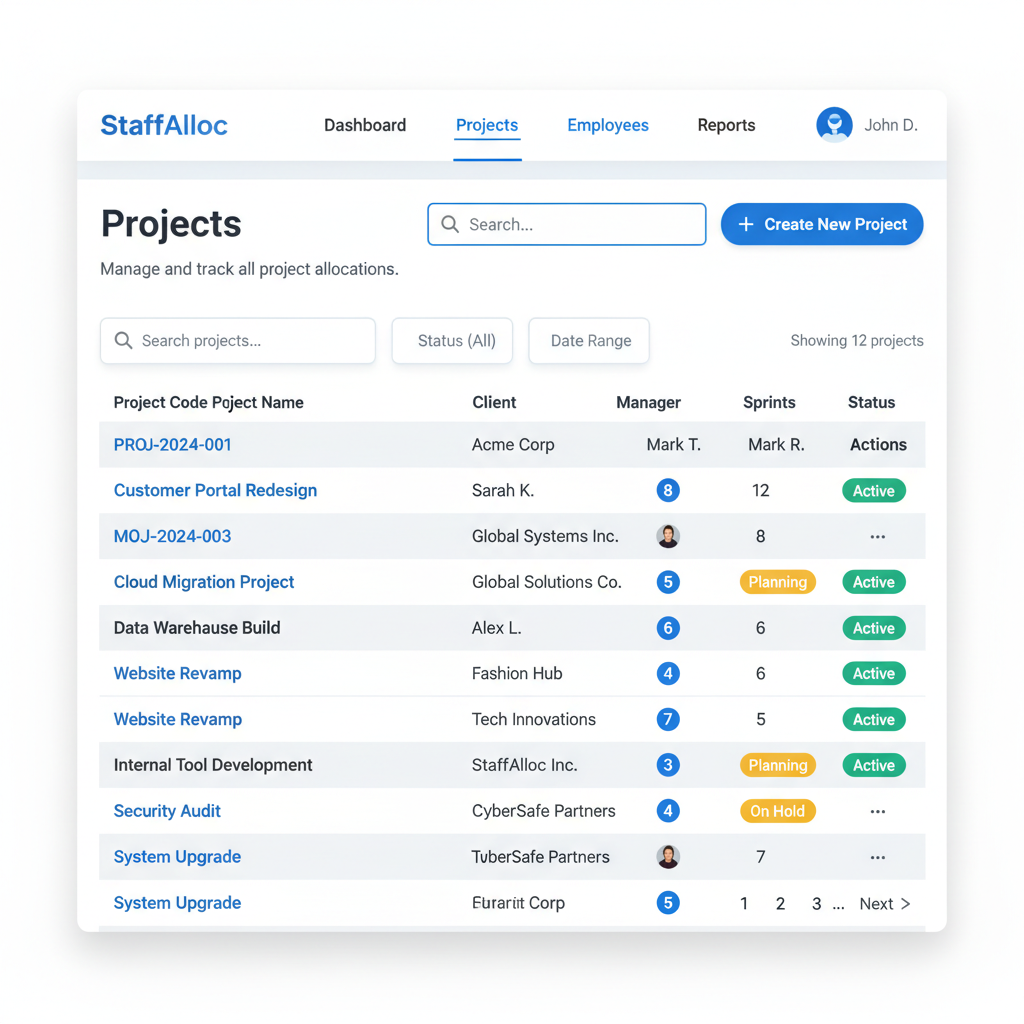

In [7]:
# Generate Projects Management View Image
screen_generation_prompt = """
Create a modern project management interface for the StaffAlloc staff allocation platform.

**Header:**
- Application header with "StaffAlloc" branding
- Navigation: Dashboard, Projects (active/highlighted), Employees, Allocations, Reports
- Search bar in center
- User profile on right

**Page Title Section:**
- "Projects" heading (large, bold) on the left
- "Create New Project" button (primary blue with + icon) on the right
- Subtitle showing "Manage and track all project allocations"

**Filters and Search Bar:**
- Search input with magnifying glass icon (placeholder: "Search projects...")
- Filter dropdowns in a row: 
  * Status (All/Active/Planning/Closed/On Hold)
  * Manager (All/Select Manager)
  * Date Range
- Results count "Showing 12 projects" on the right

**Projects Table:**
- Clean, modern table with alternating row backgrounds
- Columns:
  * Project Code (bold, blue link text)
  * Project Name
  * Client
  * Manager (with small avatar circle and name)
  * Team Size (number in badge)
  * Sprints (number)
  * Status (colored badge: Active=green, Planning=yellow, Closed=gray, On Hold=orange)
  * Actions (3-dot menu icon)
- 8-10 rows of realistic project data (e.g., "PROJ-2024-001", "Customer Portal Redesign", "Acme Corp")
- Pagination controls at bottom (showing "1 2 3 ... Next >")
- Hover effect on rows

**Visual Style:**
- Professional business application design
- Clean white background with main content in card container with shadow
- Blue primary color (#3B82F6) for interactive elements
- Status badges with appropriate colors and rounded-full style
- Table with hover states (light gray background)
- Modern sans-serif typography
- Proper spacing and alignment (padding, margins)
- Subtle shadows on the container card

Make it look like a production-ready enterprise application similar to Asana or Monday.com.
"""

print(f"Using {image_model_name} for image generation...")
file_path_projects, image_url_projects = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

if file_path_projects and image_url_projects:
    print(f"✅ Generated image saved to: {file_path_projects}")
    display(Image(url=image_url_projects))
elif image_url_projects:
    print(f"❌ Image generation failed: {image_url_projects}")
else:
    print("❌ Image generation returned no result")

In [8]:
# Explain Projects View Image
image_path = file_path_projects

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <ProjectTable> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    save_artifact(cleaned_explanation, "projects_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/projects_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

--- Requesting image explanation from vision model ---


Of course. Here is a detailed breakdown of the provided UI for a developer.

---

### 1) Summary
This screen is a project management dashboard that allows users to view, search, filter, and manage a list of company projects.

### 2) Visual Breakdown

The UI is composed of two main sections within a light gray parent background: a top navigation header and a main content card.

*   **Header (Top)**
    *   **Top-Left**: Logo text "StaffAlloc".
    *   **Top-Center**: A list of navigation links: "Dashboard", "Projects", "Employees", "Reports". "Projects" is the active link.
    *   **Top-Right**: User profile element with a user icon and the name "John D."

*   **Main Content Card (Center)**
    *   **Card Header**:
        *   **Left**: Main page title "Projects" and a subtitle "Manage and track all project allocations."
        *   **Right**: A primary search input field with a search icon and a primary "Create New Project" button with a plus icon.
    *   **Filter Bar**:
        *   **Left**: A secondary search input specifically for "Search projects...".
        *   **Center**: Two filter buttons, likely dropdowns: "Status (All)" and "Date Range".
        *   **Right**: A text label indicating the result count: "Showing 12 projects".
    *   **Projects Table**:
        *   **Table Header**: A row with column titles: "Project Code Project Name", "Client", "Manager", "Sprints", "Status", "Actions".
        *   **Table Body**: A list of project rows. Each row contains:
            *   **Project Name**: A two-line entry with a bolded project code link and the project name.
            *   **Client**: Text.
            *   **Manager**: Text, sometimes accompanied by a circular user avatar or a number in a blue circle (likely indicating team size or overflow).
            *   **Sprints**: A number.
            *   **Status**: A colored, rounded pill/badge (e.g., green for "Active", yellow for "Planning", orange for "On Hold").
            *   **Actions**: An ellipsis ("...") icon button.
    *   **Table Footer/Pagination**:
        *   **Bottom-Right**: Pagination controls: "1", "2", "3", "...", "Next >".

### 3) Style Details

*   **Colors**:
    *   **Background**: A very light gray (approx. `bg-gray-50` or `bg-slate-50`).
    *   **Primary Blue**: A vibrant blue used for the logo, active nav link underline, main button, project code links, and manager count circles (approx. `blue-500` or `blue-600`).
    *   **Text**:
        *   Headings: Near-black (`text-gray-900`).
        *   Body/Subtle Text: Dark to medium gray (`text-gray-700`, `text-gray-500`).
        *   Button Text (Primary): White.
    *   **Borders**: Light gray (`gray-200` or `gray-300`) for the header bottom border, inputs, and table rows.
    *   **Status Pills**:
        *   **Active**: Light green background, dark green text (`bg-green-100 text-green-800`).
        *   **Planning**: Light yellow background, dark yellow/brown text (`bg-yellow-100 text-yellow-800`).
        *   **On Hold**: Light orange background, dark orange text (`bg-orange-100 text-orange-800`).
*   **Typography**:
    *   **Font**: A clean, sans-serif font like Inter or SF Pro.
    *   **Main Heading ("Projects")**: Large and extra-bold (e.g., `text-3xl font-extrabold`).
    *   **Subheading**: Regular weight, smaller size (e.g., `text-base text-gray-600`).
    *   **Table Headers**: Medium weight, small, slightly spaced-out letters, and gray (`font-medium text-sm text-gray-500 tracking-wider`).
    *   **Table Body**: Regular weight, `text-sm`. Project codes are bold links.
*   **Spacing & Layout**:
    *   **Padding**: Generous padding within the main content card (`p-6` or `p-8`) and the header.
    *   **Gaps**: Consistent spacing between filter elements (`gap-4`) and header elements.
    *   **Alignment**: Content is generally left-aligned. Table columns like Sprints, Status, and Actions appear to be center-aligned or have their content centered.
*   **Borders & Shadows**:
    *   **C

✅ Saved explanation to artifacts/projects_image_explanation.md


In [9]:
# Generate Projects Monolithic Code
image_explanation = load_artifact("projects_image_explanation.md")

generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function ProjectsView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    save_artifact(cleaned_code, "projects_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/projects_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

--- Generating Monolithic UI Component ---


import React from 'react';
import { Search, Plus, User, MoreHorizontal, ChevronDown } from 'lucide-react';

// TypeScript types for better code organization
type Status = 'Active' | 'Planning' | 'On Hold';
type Manager = { type: 'text'; name: string } | { type: 'avatar'; name: string; avatarUrl: string } | { type: 'count'; count: number };

type Project = {
  id: string;
  code: string;
  name: string;
  client: string;
  manager: Manager;
  sprints: number;
  status: Status;
};

// Dummy data to populate the table, matching the design
const projectsData: Project[] = [
  { id: '1', code: 'PROJ-2024-001', name: 'Customer Portal Redesign', client: 'Acme Corp', manager: { type: 'text', name: 'Mark T.' }, sprints: 12, status: 'Active' },
  { id: '2', code: 'MOJ-2024-003', name: 'Cloud Migration Project', client: 'Global Systems Inc.', manager: { type: 'avatar', name: 'Sarah K.', avatarUrl: 'https://i.pravatar.cc/150?u=sarah' }, sprints: 8, status: 'Active' },
  { id: '3', code: 'CPR-2024-002', name: 'Data Warehouse Build', client: 'Global Solutions Co.', manager: { type: 'count', count: 5 }, sprints: 6, status: 'Planning' },
  { id: '4', code: 'DWB-2024-004', name: 'Website Revamp', client: 'Alex L.', manager: { type: 'count', count: 6 }, sprints: 6, status: 'Active' },
  { id: '5', code: 'WRV-2024-005', name: 'Website Revamp', client: 'Fashion Hub', manager: { type: 'count', count: 4 }, sprints: 6, status: 'Active' },
  { id: '6', code: 'ITD-2024-006', name: 'Internal Tool Development', client: 'Tech Innovations', manager: { type: 'count', count: 7 }, sprints: 5, status: 'Active' },
  { id: '7', code: 'SAU-2024-007', name: 'Security Audit', client: 'StaffAlloc Inc.', manager: { type: 'count', count: 3 }, sprints: 4, status: 'Planning' },
  { id: '8', code: 'SUP-2024-008', name: 'System Upgrade', client: 'CyberSafe Partners', manager: { type: 'count', count: 4 }, sprints: 7, status: 'On Hold' },
  { id: '9', code: 'SUP-2024-009', name: 'System Upgrade', client: 'TuberSafe Partners', manager: { type: 'avatar', name: 'John Doe', avatarUrl: 'https://i.pravatar.cc/150?u=john' }, sprints: 7, status: '...' },
  { id: '10', code: 'EAP-2024-010', name: 'System Upgrade', client: 'Eurariit Corp', manager: { type: 'count', count: 5 }, sprints: 1, status: '...' },
];

// Helper component for Status Pills
const StatusPill: React.FC<{ status: Status | '...' }> = ({ status }) => {
  const baseClasses = "px-3 py-1 text-xs font-semibold rounded-full inline-block";
  switch (status) {
    case 'Active':
      return <span className={`${baseClasses} bg-green-100 text-green-800`}>Active</span>;
    case 'Planning':
      return <span className={`${baseClasses} bg-yellow-100 text-yellow-800`}>Planning</span>;
    case 'On Hold':
      return <span className={`${baseClasses} bg-orange-100 text-orange-800`}>On Hold</span>;
    default:
        return null;
  }
};

// Helper component for Manager cell
const ManagerCell: React.FC<{ manager: Manager }> = ({ manager }) => {
  switch (manager.type) {
    case 'text':
      return <span className="text-gray-800">{manager.name}</span>;
    case 'avatar':
      return (
        <div className="flex items-center justify-center">
          <img src={manager.avatarUrl} alt={manager.name} className="w-7 h-7 rounded-full" />
        </div>
      );
    case 'count':
      return (
        <div className="flex items-center justify-center">
          <span className="flex items-center justify-center w-7 h-7 bg-blue-100 text-blue-700 rounded-full text-xs font-bold">
            {manager.count}
          </span>
        </div>
      );
  }
};

export default function ProjectsView() {
  return (
    <div className="bg-slate-50 min-h-screen font-sans">
      <header className="bg-white border-b border-gray-200">
        <div className="max-w-7xl mx-auto px-4 sm:px-6 lg:px-8">
          <div className="flex justify-between items-center h-16">
            <div className="flex items-center gap-10">
              <div classNa

✅ Saved monolithic code to artifacts/projects_monolithic.jsx


In [10]:
# Refactor Projects Code into Components
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., buttons, cards, icons) into reusable components
   - Separate layout sections (e.g., header, filters, table) into dedicated components
   - Create styled button components, table row components, filter components, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<ProjectsHeader>`, `<ProjectTable>`, `<ProjectRow>`, `<StatusBadge>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    save_artifact(cleaned_refactored_code, "projects_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/projects_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


javascript
import React from 'react';
import { Search, Plus, User, MoreHorizontal, ChevronDown } from 'lucide-react';

//==============================================================================
// TYPES & DATA
//==============================================================================

type Status = 'Active' | 'Planning' | 'On Hold';
type Manager = { type: 'text'; name: string } | { type: 'avatar'; name: string; avatarUrl: string } | { type: 'count'; count: number };

type Project = {
  id: string;
  code: string;
  name: string;
  client: string;
  manager: Manager;
  sprints: number;
  status: Status | '...'; // Allow for '...' status
};

const projectsData: Project[] = [
  { id: '1', code: 'PROJ-2024-001', name: 'Customer Portal Redesign', client: 'Acme Corp', manager: { type: 'text', name: 'Mark T.' }, sprints: 12, status: 'Active' },
  { id: '2', code: 'MOJ-2024-003', name: 'Cloud Migration Project', client: 'Global Systems Inc.', manager: { type: 'avatar', name: 'Sarah K.', avatarUrl: 'https://i.pravatar.cc/150?u=sarah' }, sprints: 8, status: 'Active' },
  { id: '3', code: 'CPR-2024-002', name: 'Data Warehouse Build', client: 'Global Solutions Co.', manager: { type: 'count', count: 5 }, sprints: 6, status: 'Planning' },
  { id: '4', code: 'DWB-2024-004', name: 'Website Revamp', client: 'Alex L.', manager: { type: 'count', count: 6 }, sprints: 6, status: 'Active' },
  { id: '5', code: 'WRV-2024-005', name: 'Website Revamp', client: 'Fashion Hub', manager: { type: 'count', count: 4 }, sprints: 6, status: 'Active' },
  { id: '6', code: 'ITD-2024-006', name: 'Internal Tool Development', client: 'Tech Innovations', manager: { type: 'count', count: 7 }, sprints: 5, status: 'Active' },
  { id: '7', code: 'SAU-2024-007', name: 'Security Audit', client: 'StaffAlloc Inc.', manager: { type: 'count', count: 3 }, sprints: 4, status: 'Planning' },
  { id: '8', code: 'SUP-2024-008', name: 'System Upgrade', client: 'CyberSafe Partners', manager: { type: 'count', count: 4 }, sprints: 7, status: 'On Hold' },
  { id: '9', code: 'SUP-2024-009', name: 'System Upgrade', client: 'TuberSafe Partners', manager: { type: 'avatar', name: 'John Doe', avatarUrl: 'https://i.pravatar.cc/150?u=john' }, sprints: 7, status: '...' },
  { id: '10', code: 'EAP-2024-010', name: 'System Upgrade', client: 'Eurariit Corp', manager: { type: 'count', count: 5 }, sprints: 1, status: '...' },
];


//==============================================================================
// ATOMIC & UI COMPONENTS
//==============================================================================

const StatusPill: React.FC<{ status: Status | '...' }> = ({ status }) => {
  const baseClasses = "px-3 py-1 text-xs font-semibold rounded-full inline-block";
  switch (status) {
    case 'Active':
      return <span className={`${baseClasses} bg-green-100 text-green-800`}>Active</span>;
    case 'Planning':
      return <span className={`${baseClasses} bg-yellow-100 text-yellow-800`}>Planning</span>;
    case 'On Hold':
      return <span className={`${baseClasses} bg-orange-100 text-orange-800`}>On Hold</span>;
    default:
      return null;
  }
};

const ManagerCell: React.FC<{ manager: Manager }> = ({ manager }) => {
  switch (manager.type) {
    case 'text':
      return <span className="text-gray-800">{manager.name}</span>;
    case 'avatar':
      return (
        <div className="flex items-center justify-center">
          <img src={manager.avatarUrl} alt={manager.name} className="w-7 h-7 rounded-full" />
        </div>
      );
    case 'count':
      return (
        <div className="flex items-center justify-center">
          <span className="flex items-center justify-center w-7 h-7 bg-blue-100 text-blue-700 rounded-full text-xs font-bold">
            {manager.count}
          </span>
        </div>
      );
  }
};

const SearchInput: React.FC<{ placeholder: string; className?: string }> = ({ placeholder, className = '' }) => (
  <div className={`relative ${classNa

✅ Saved refactored code to artifacts/projects_refactored.jsx


---

# VIEW 3: Allocations Calendar

Generate the staff allocation calendar interface

Using gemini-2.5-flash-image-preview for image generation...
✅ Generated image saved to: /Users/brianfisher/trainingRepos/220372-AG-AISOFTDEV-Team-1-AINavigators/artifacts/screens/image_1762379006.png



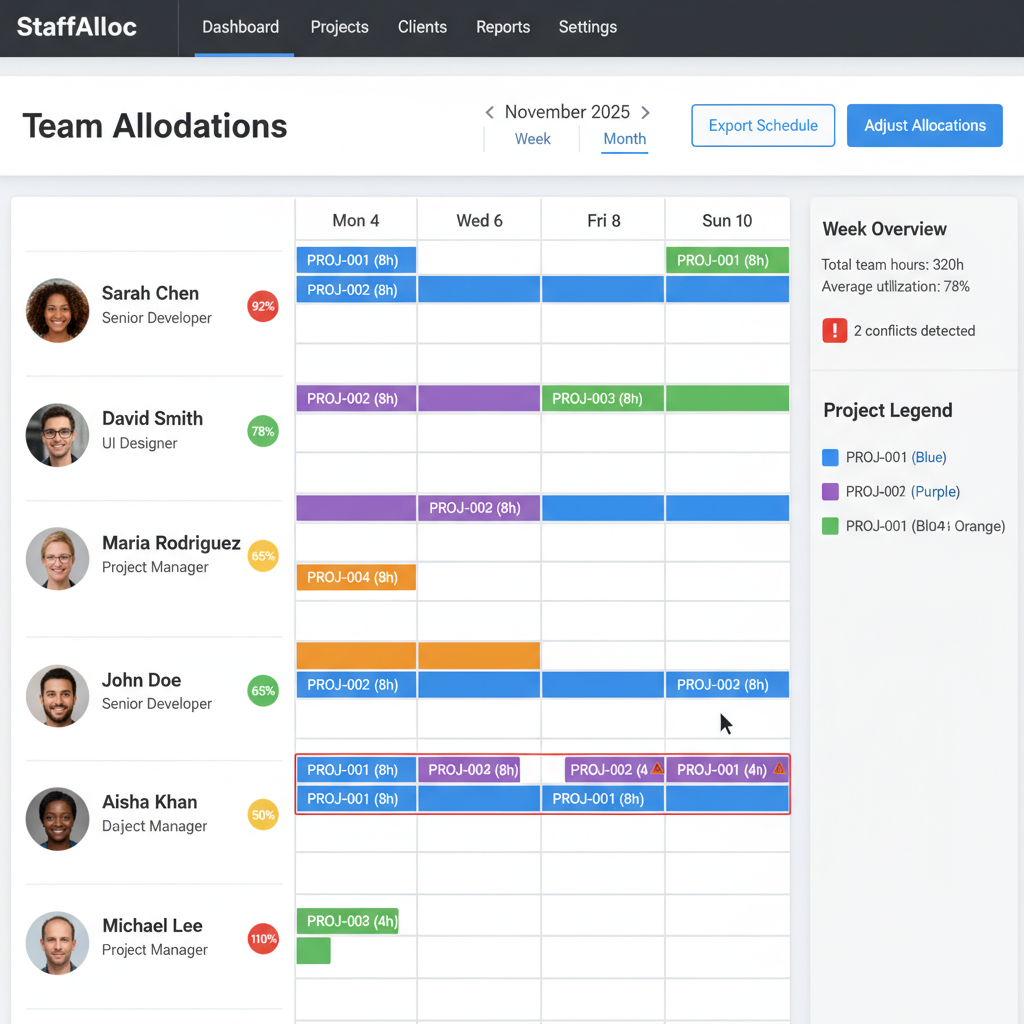

In [11]:
# Generate Allocations Calendar View Image
screen_generation_prompt = """
Create a staff allocation calendar interface for the StaffAlloc platform showing employee work schedules.

**Header:**
- StaffAlloc branding and full navigation
- Current view: "Allocations" tab highlighted

**Page Header:**
- "Team Allocations" title (large, bold)
- Month/Week selector with arrows: "< November 2025 >" 
- View toggle: Week / Month (Week selected)
- "Export Schedule" button and "Adjust Allocations" button on right

**Calendar Grid Layout:**
- Left column (fixed, ~200px): Employee list
  * Each row shows: avatar circle, name, role (smaller text)
  * Utilization percentage badge next to name (color-coded: <70%=yellow, 70-90%=green, >90%=red)
- Top row: Week dates (7 columns)
  * Date numbers with day names (e.g., "Mon 4", "Tue 5", etc.)
- Grid cells showing allocation bars:
  * Horizontal colored bars representing projects
  * Project code labels on bars (e.g., "PROJ-001")
  * Hour indicators (e.g., "8h", "4h")
  * Multiple bars can stack in one cell
  * Different colors for different projects (blue, purple, green, orange)
  * Empty cells for unallocated time

**Employee Rows (6-7 employees):**
- Mix of roles: "Senior Developer", "UI Designer", "Project Manager", "Data Analyst"
- Realistic names with avatars
- Show variety: some over-allocated (red), some fully allocated (green), some under-allocated (yellow)

**Right Sidebar - Week Summary:**
- "Week Overview" heading
- Total team hours: 320h
- Average utilization: 78%
- Conflicts warning badge (if any): "2 conflicts detected"
- Project legend showing color mappings

**Visual Design:**
- Modern calendar/Gantt chart style interface
- Clear grid with light borders
- Colorful project bars with good contrast on white background
- Professional color palette (varied but harmonious)
- Clean, organized layout
- Tooltips on hover (indicated with cursor icons)
- Visual indicators for over/under allocation
- Responsive table layout

Make it look like professional resource planning tools like Float, Forecast, or Resource Guru.
"""

print(f"Using {image_model_name} for image generation...")
file_path_allocations, image_url_allocations = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

if file_path_allocations and image_url_allocations:
    print(f"✅ Generated image saved to: {file_path_allocations}")
    display(Image(url=image_url_allocations))
elif image_url_allocations:
    print(f"❌ Image generation failed: {image_url_allocations}")
else:
    print("❌ Image generation returned no result")

In [12]:
# Explain Allocations View Image
image_path = file_path_allocations

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <AllocationGrid> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    save_artifact(cleaned_explanation, "allocations_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/allocations_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

--- Requesting image explanation from vision model ---


Of course. Here is a detailed analysis and implementation plan for the "Team Allocations" UI, designed for a developer.

---

### 1) Summary
This screen provides a visual schedule of team member allocations to various projects over a selected time period, highlighting individual utilization rates and potential scheduling conflicts.

### 2) Visual Breakdown

The UI is composed of three main horizontal sections within a primary application layout.

*   **Top Navigation Bar:**
    *   **Top-Left:** Logo ("StaffAlloc").
    *   **Top-Center:** Main navigation links ("Dashboard", "Projects", "Clients", "Reports", "Settings"). "Dashboard" is the active page.

*   **Page Header (Below Navigation):**
    *   **Left:** Page Title: "Team Allocations" (Note: "Allodations" in the image is a typo).
    *   **Center-Right:**
        *   **Date Navigator:** Previous/Next month/week controls (`< November 2025 >`).
        *   **View Toggler:** "Week" and "Month" options. "Month" is currently selected.
    *   **Far-Right:** Action Buttons:
        *   "Export Schedule" (secondary/outlined button).
        *   "Adjust Allocations" (primary/solid button).

*   **Main Content Area (Large Card):** This area is a two-column layout.
    *   **Left Column (Staff List):**
        *   A vertically stacked list of team members.
        *   Each item includes: a circular user avatar, the user's name (bold), their job title (lighter text), and a circular utilization percentage badge on the right.
    *   **Right Column (Allocation Grid & Sidebar):** This is a responsive grid layout.
        *   **Timeline Grid (Primary section):**
            *   **Header:** Days of the week/month ("Mon 4", "Wed 6", etc.).
            *   **Rows:** Each row aligns horizontally with a team member from the left column. Thin horizontal and vertical lines create the grid structure.
            *   **Allocation Blocks:** Colored rectangular blocks representing project assignments. They contain the project ID and hours (e.g., "PROJ-001 (8h)"). Some blocks span multiple days. One row shows stacked blocks, indicating multiple assignments on the same day, which is flagged as a conflict.
        *   **Sidebar (Far-right section):**
            *   **Week Overview Card:** Title, total team hours, average utilization, and a prominent warning for "2 conflicts detected".
            *   **Project Legend Card:** Title and a list of projects, each with a corresponding color swatch and name.

### 3) Style Details

*   **Colors:**
    *   **Background:** Light Gray (approx. `slate-100` / `#F1F5F9`).
    *   **Primary UI Elements:** White for cards (`#FFFFFF`).
    *   **Primary Action Color:** A bright Blue (approx. `blue-500` / `#3B82F6`) used for the primary button, active nav link, and some allocation blocks.
    *   **Text:** Dark Gray/Black for primary text (`slate-800` / `#1E293B`), lighter Gray for secondary text like job titles (`slate-500` / `#64748B`). White text on dark/colored backgrounds.
    *   **Borders:** Light Gray (`slate-200` / `#E2E8F0`) for grid lines and the secondary button.
    *   **Indicators & Palettes:**
        *   **Utilization Badges:** Colors represent status: Green (good, e.g., 78%), Yellow/Orange (caution, e.g., 50%), Red (over-utilized, e.g., 110%). The background is a light tint of the text color.
        *   **Allocation Blocks:** A categorical color palette (Blue, Purple, Green, Orange) is used to differentiate projects.
        *   **Conflict/Error:** A strong Red (`red-500` / `#EF4444`) for the conflict warning icon and the border around the conflicting allocations.

*   **Typography:**
    *   **Font:** A clean, modern sans-serif (e.g., Inter, system-ui).
    *   **Page Title:** Large and bold (e.g., `text-3xl`, `font-bold`).
    *   **Card Titles:** Medium size and semi-bold (e.g., `text-lg`, `font-semibold`).
    *   **Body Text:** Regular weight, standard size (e.g., `text-sm` or `text-base`).
    *   **Allocation Block Text:** Small and clear 

✅ Saved explanation to artifacts/allocations_image_explanation.md


In [13]:
# Generate Allocations Monolithic Code
image_explanation = load_artifact("allocations_image_explanation.md")

generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function AllocationsView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    save_artifact(cleaned_code, "allocations_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/allocations_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

--- Generating Monolithic UI Component ---


import React from 'react';
import { ChevronLeft, ChevronRight, AlertTriangle } from 'lucide-react';

const staffData = [
  {
    id: 1,
    name: 'Sarah Chen',
    title: 'Senior Developer',
    avatar: 'https://i.pravatar.cc/150?u=sarahchen',
    utilization: 92,
  },
  {
    id: 2,
    name: 'David Smith',
    title: 'UI Designer',
    avatar: 'https://i.pravatar.cc/150?u=davidsmith',
    utilization: 78,
  },
  {
    id: 3,
    name: 'Maria Rodriguez',
    title: 'Project Manager',
    avatar: 'https://i.pravatar.cc/150?u=mariarodriguez',
    utilization: 65,
  },
  {
    id: 4,
    name: 'John Doe',
    title: 'Senior Developer',
    avatar: 'https://i.pravatar.cc/150?u=johndoe',
    utilization: 65,
  },
  {
    id: 5,
    name: 'Aisha Khan',
    title: 'Project Manager', // Corrected from Dajact Manager
    avatar: 'https://i.pravatar.cc/150?u=aishakhan',
    utilization: 50,
  },
  {
    id: 6,
    name: 'Michael Lee',
    title: 'Project Manager',
    avatar: 'https://i.pravatar.cc/150?u=michaellee',
    utilization: 110,
  },
];

const projects = {
  'PROJ-001': { name: 'Blue', color: 'bg-blue-500' },
  'PROJ-002': { name: 'Purple', color: 'bg-purple-500' },
  'PROJ-003': { name: 'Green', color: 'bg-green-500' },
  'PROJ-004': { name: 'Orange', color: 'bg-orange-500' },
};

const allocations = [
  // Sarah Chen
  { id: 1, staffId: 1, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 1, span: 2 },
  { id: 2, staffId: 1, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 3, span: 4 },
  { id: 3, staffId: 1, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 7, span: 1 },
  // David Smith
  { id: 4, staffId: 2, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 1, span: 2 },
  { id: 5, staffId: 2, projectId: 'PROJ-003', text: 'PROJ-003 (8h)', start: 5, span: 3 },
  // Maria Rodriguez
  { id: 6, staffId: 3, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 3, span: 5 },
  { id: 7, staffId: 3, projectId: 'PROJ-004', text: 'PROJ-004 (8h)', start: 1, span: 2 },
  // John Doe
  { id: 8, staffId: 4, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 1, span: 2 },
  { id: 9, staffId: 4, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 4, span: 2 },
  { id: 10, staffId: 4, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 7, span: 1 },
  // Aisha Khan
  { id: 11, staffId: 5, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 1, span: 1, conflict: false, stack: 1 },
  { id: 12, staffId: 5, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 1, span: 1, conflict: false, stack: 2 },
  { id: 13, staffId: 5, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 2, span: 1, conflict: false, stack: 1 },
  { id: 14, staffId: 5, projectId: 'PROJ-002', text: 'PROJ-002 (4h)', start: 3, span: 1, conflict: true, stack: 1 },
  { id: 15, staffId: 5, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 3, span: 1, conflict: false, stack: 2 },
  { id: 16, staffId: 5, projectId: 'PROJ-001', text: 'PROJ-001 (4h)', start: 4, span: 1, conflict: true, stack: 1 },
  // Michael Lee
  { id: 17, staffId: 6, projectId: 'PROJ-003', text: 'PROJ-003 (4h)', start: 1, span: 1 },
];

const UtilizationBadge = ({ value }) => {
  const colorClasses =
    value > 100
      ? 'bg-red-100 text-red-700'
      : value >= 90
      ? 'bg-red-100 text-red-700' // 92% is red in the image
      : value > 70
      ? 'bg-green-100 text-green-700'
      : value > 50
      ? 'bg-yellow-100 text-yellow-600'
      : 'bg-yellow-100 text-yellow-600'; // 50% is yellow/orange
  
  return (
    <div className={`ml-auto flex h-10 w-10 shrink-0 items-center justify-center rounded-full text-sm font-bold ${colorClasses}`}>
      {value}%
    </div>
  );
};

export default function TeamAllocations() {
  const navItems = ['Dashboard', 'Projects', 'Clients', 'Reports', 'Settings'];
  const timelineHeaders = ['Mon 4', 'Tue 5', 'Wed 6', 'Thu 7', 'Fri 8', 'Sat 9', 'Sun 10'];

  return (
    <div className="min-h-screen bg-slate-100 font-sans text-slate-800">
      <header

✅ Saved monolithic code to artifacts/allocations_monolithic.jsx


In [14]:
# Refactor Allocations Code into Components
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., allocation bars, calendar cells) into reusable components
   - Separate layout sections (e.g., header, calendar grid, sidebar) into dedicated components
   - Create styled components for allocation bars, employee rows, date headers, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<AllocationsHeader>`, `<CalendarGrid>`, `<AllocationBar>`, `<EmployeeRow>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    save_artifact(cleaned_refactored_code, "allocations_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/allocations_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


import React from 'react';
import { ChevronLeft, ChevronRight, AlertTriangle } from 'lucide-react';

// --- TYPE DEFINITIONS ---
interface Staff {
  id: number;
  name: string;
  title: string;
  avatar: string;
  utilization: number;
}

interface Project {
  name: string;
  color: string;
}

interface Projects {
  [key: string]: Project;
}

interface Allocation {
  id: number;
  staffId: number;
  projectId: string;
  text: string;
  start: number;
  span: number;
  conflict?: boolean;
  stack?: number;
}


// --- DATA MOCKS ---
const staffData: Staff[] = [
  { id: 1, name: 'Sarah Chen', title: 'Senior Developer', avatar: 'https://i.pravatar.cc/150?u=sarahchen', utilization: 92 },
  { id: 2, name: 'David Smith', title: 'UI Designer', avatar: 'https://i.pravatar.cc/150?u=davidsmith', utilization: 78 },
  { id: 3, name: 'Maria Rodriguez', title: 'Project Manager', avatar: 'https://i.pravatar.cc/150?u=mariarodriguez', utilization: 65 },
  { id: 4, name: 'John Doe', title: 'Senior Developer', avatar: 'https://i.pravatar.cc/150?u=johndoe', utilization: 65 },
  { id: 5, name: 'Aisha Khan', title: 'Project Manager', avatar: 'https://i.pravatar.cc/150?u=aishakhan', utilization: 50 },
  { id: 6, name: 'Michael Lee', title: 'Project Manager', avatar: 'https://i.pravatar.cc/150?u=michaellee', utilization: 110 },
];

const projects: Projects = {
  'PROJ-001': { name: 'Blue', color: 'bg-blue-500' },
  'PROJ-002': { name: 'Purple', color: 'bg-purple-500' },
  'PROJ-003': { name: 'Green', color: 'bg-green-500' },
  'PROJ-004': { name: 'Orange', color: 'bg-orange-500' },
};

const allocations: Allocation[] = [
  { id: 1, staffId: 1, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 1, span: 2 },
  { id: 2, staffId: 1, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 3, span: 4 },
  { id: 3, staffId: 1, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 7, span: 1 },
  { id: 4, staffId: 2, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 1, span: 2 },
  { id: 5, staffId: 2, projectId: 'PROJ-003', text: 'PROJ-003 (8h)', start: 5, span: 3 },
  { id: 6, staffId: 3, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 3, span: 5 },
  { id: 7, staffId: 3, projectId: 'PROJ-004', text: 'PROJ-004 (8h)', start: 1, span: 2 },
  { id: 8, staffId: 4, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 1, span: 2 },
  { id: 9, staffId: 4, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 4, span: 2 },
  { id: 10, staffId: 4, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 7, span: 1 },
  { id: 11, staffId: 5, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 1, span: 1, conflict: false, stack: 1 },
  { id: 12, staffId: 5, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 1, span: 1, conflict: false, stack: 2 },
  { id: 13, staffId: 5, projectId: 'PROJ-002', text: 'PROJ-002 (8h)', start: 2, span: 1, conflict: false, stack: 1 },
  { id: 14, staffId: 5, projectId: 'PROJ-002', text: 'PROJ-002 (4h)', start: 3, span: 1, conflict: true, stack: 1 },
  { id: 15, staffId: 5, projectId: 'PROJ-001', text: 'PROJ-001 (8h)', start: 3, span: 1, conflict: false, stack: 2 },
  { id: 16, staffId: 5, projectId: 'PROJ-001', text: 'PROJ-001 (4h)', start: 4, span: 1, conflict: true, stack: 1 },
  { id: 17, staffId: 6, projectId: 'PROJ-003', text: 'PROJ-003 (4h)', start: 1, span: 1 },
];


// --- ATOMIC & REUSABLE COMPONENTS ---

const UtilizationBadge = ({ value }: { value: number }) => {
  const colorClasses =
    value > 100 ? 'bg-red-100 text-red-700'
    : value >= 90 ? 'bg-red-100 text-red-700'
    : value > 70 ? 'bg-green-100 text-green-700'
    : value > 50 ? 'bg-yellow-100 text-yellow-600'
    : 'bg-yellow-100 text-yellow-600';
  
  return (
    <div className={`ml-auto flex h-10 w-10 shrink-0 items-center justify-center rounded-full text-sm font-bold ${colorClasses}`}>
      {value}%
    </div>
  );
};

const AbsoluteAllocationBar = ({ allocation, project, rowIndex }: { allocation: Allocation, project: Project, rowIndex: number }) => (
  <di

✅ Saved refactored code to artifacts/allocations_refactored.jsx


---

# VIEW 4: Employees Management

Generate the employee management interface

Using gemini-2.5-flash-image-preview for image generation...
✅ Generated image saved to: /Users/brianfisher/trainingRepos/220372-AG-AISOFTDEV-Team-1-AINavigators/artifacts/screens/image_1762379177.png



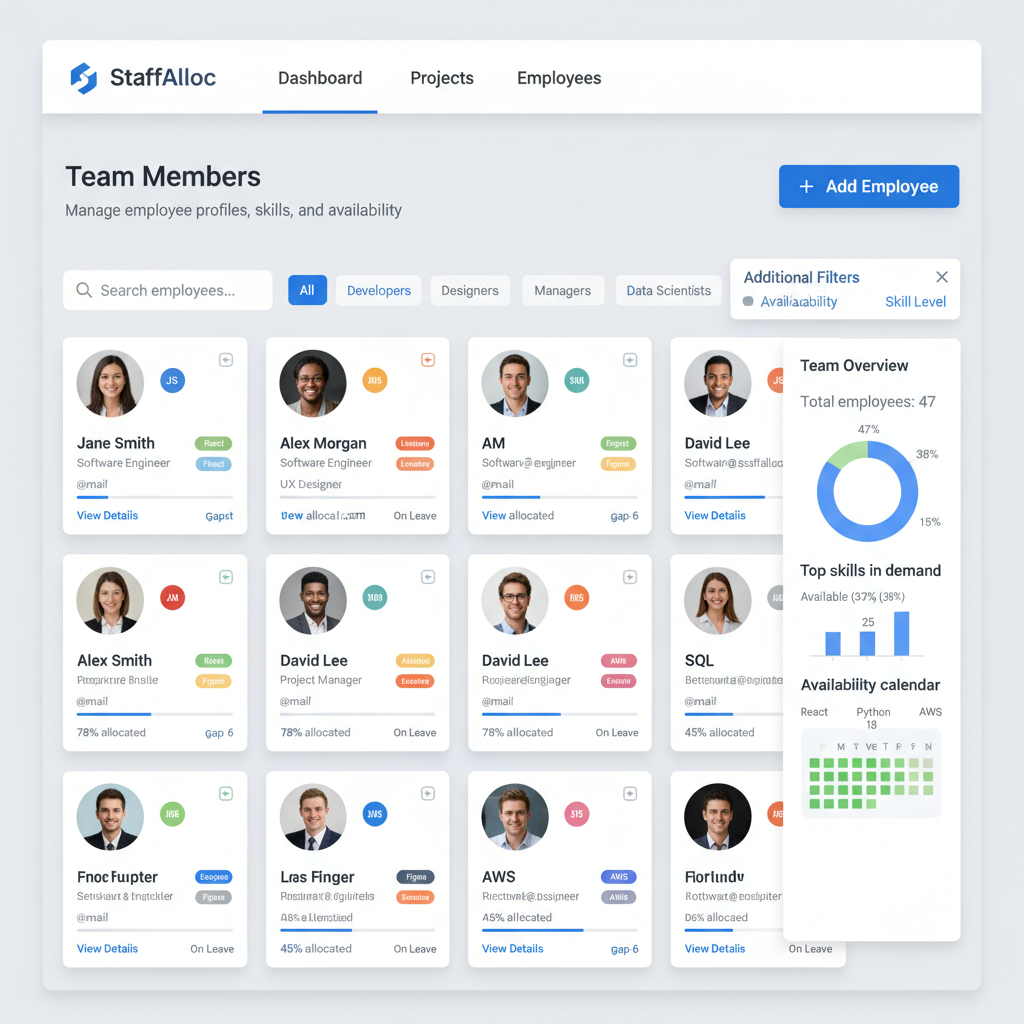

In [15]:
# Generate Employees Management View Image
screen_generation_prompt = """
Create an employee management interface for the StaffAlloc platform.

**Header:**
- StaffAlloc branding and navigation
- "Employees" tab active/highlighted

**Page Header:**
- "Team Members" heading on left
- "Add Employee" button (blue, with + icon) on right
- Subtitle: "Manage employee profiles, skills, and availability"

**Search and Filters:**
- Search bar: "Search employees..."
- Filter chips: All (selected), Developers, Designers, Managers, Data Scientists
- Additional filters dropdown: Department, Availability, Skill Level

**Employee Grid/Cards:**
- Grid layout showing employee cards (3-4 per row)
- Each card contains:
  * Large avatar circle at top
  * Full name (bold)
  * Role/title below name
  * Email address (small text)
  * Skill tags (3-4 tags): e.g., "React", "Python", "Leadership", "AWS"
  * Current status badge: Available (green), Assigned (blue), On Leave (gray)
  * Utilization bar: visual progress bar showing "78% allocated"
  * "View Details" link button at bottom
- 9-12 employee cards with realistic data
- Cards have subtle shadow and hover effect

**Right Sidebar - Team Stats:**
- "Team Overview" heading
- Total employees: 47
- Utilization chart (donut/pie chart)
- Top skills in demand (bar chart or list)
- Availability calendar (mini calendar showing team availability)

**Visual Style:**
- Modern, card-based layout
- Professional photos/avatars (or colored placeholder circles with initials)
- Clean white cards on light gray background
- Consistent spacing in grid (gap-6)
- Skill tags: small rounded pills in various soft colors
- Status badges with appropriate colors
- Hover effects on cards (slight shadow increase, scale)
- Professional typography

Make it look like a modern HR/people management platform like BambooHR or Workday.
"""

print(f"Using {image_model_name} for image generation...")
file_path_employees, image_url_employees = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

if file_path_employees and image_url_employees:
    print(f"✅ Generated image saved to: {file_path_employees}")
    display(Image(url=image_url_employees))
elif image_url_employees:
    print(f"❌ Image generation failed: {image_url_employees}")
else:
    print("❌ Image generation returned no result")

In [16]:
# Explain Employees View Image
image_path = file_path_employees

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <EmployeeCard> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    save_artifact(cleaned_explanation, "employees_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/employees_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

--- Requesting image explanation from vision model ---


Of course. Here is a detailed, developer-focused analysis of the provided UI.

***

### 1) Summary
This screen is a team management dashboard that allows a user to view, search, and filter a grid of employee profiles, while also providing high-level team analytics in a sidebar.

### 2) Visual Breakdown
The UI is composed of a primary content area and a right-hand sidebar, all under a main application header.

*   **Main Header (Top):**
    *   **Logo:** `StaffAlloc` logo, top-left.
    *   **Navigation:** Centered links: `Dashboard` (active), `Projects`, `Employees`. The active link has a blue underline.

*   **Main Content Area (Center-Left, on a light grey background):**
    *   **Page Header:**
        *   **Title:** "Team Members", top-left.
        *   **Subtitle:** "Manage employee profiles, skills, and availability", directly below the title.
        *   **Primary Action Button:** "+ Add Employee" button, top-right.
    *   **Filter & Search Bar:**
        *   **Search Input:** Left-aligned, with a search icon, placeholder text "Search employees...".
        *   **Role Filters:** A row of pill-style buttons to the right of the search bar: `All` (active), `Developers`, `Designers`, `Managers`, `Data Scientists`.
    *   **Employee Grid:**
        *   A responsive grid of `EmployeeCard` components (appears to be 4 columns in this view).
    *   **Employee Card (Individual Item):**
        *   **Container:** A white card with rounded corners and a subtle shadow.
        *   **Profile Image:** Circular avatar, top-left.
        *   **Initials Badge:** Small, colored circle with employee initials, overlapping the top-right of the profile image.
        *   **Quick Action Icon:** Small, circular `+` icon button, top-right of the card.
        *   **Employee Info:** Centered vertically: Name (bold), Job Title, Email address (lighter text).
        *   **Skill Tags:** A row of small, colored pill-shaped tags (e.g., "React", "Figma").
        *   **Divider:** A thin horizontal line separating the main info from the footer.
        *   **Card Footer:** A flex row containing:
            *   Left: "View Details" link.
            *   Right: Status info, which varies per card (e.g., "78% allocated", "On Leave", "gap 6").

*   **Sidebar (Right):**
    *   **Additional Filters Card:**
        *   Title: "Additional Filters", with a close `X` icon.
        *   Filters: "Availability" and "Skill Level" with radio-button-like indicators.
    *   **Team Overview Card:**
        *   Title: "Team Overview".
        *   Metric: "Total employees: 47".
        *   Chart: A donut chart showing percentage breakdowns (47%, 38%, 15%).
    *   **Top Skills Card:**
        *   Title: "Top skills in demand".
        *   Subtitle: "Available (37% (38%))".
        *   Chart: A simple vertical bar chart with two bars.
    *   **Availability Calendar Card:**
        *   Title: "Availability calendar".
        *   Legend: "React", "Python", "AWS".
        *   Grid: A 7-column grid representing days of the week, with colored squares indicating availability.

### 3) Style Details
*   **Colors:**
    *   **Primary:** A strong blue (`#3B82F6` or similar) used for buttons, active links, icons, and chart elements.
    *   **Background:** A very light grey (`#F8FAFC` or `slate-50`).
    *   **Card/Surface:** White (`#FFFFFF`).
    *   **Text (Primary):** Dark charcoal/black (`#1E293B` or `slate-800`).
    *   **Text (Secondary):** Medium grey (`#64748B` or `slate-500`) for subtitles, emails, and labels.
    *   **Borders:** Light grey (`#E2E8F0` or `slate-200`).
    *   **Tag/Pill Colors:** Various soft colors with corresponding text: light green, light orange, light blue, light red.
    *   **Chart Colors:** Blue, light green, light grey for the donut. Blue for the bar chart. Shades of green for the calendar.
*   **Typography:**
    *   **Font:** A clean, modern sans-serif (e.g., Inter, Poppins).
    *   **Page Title:** Large, bold (approx. `24px` or `text-2xl

✅ Saved explanation to artifacts/employees_image_explanation.md


In [17]:
# Generate Employees Monolithic Code
image_explanation = load_artifact("employees_image_explanation.md")

generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function EmployeesView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    save_artifact(cleaned_code, "employees_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/employees_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

--- Generating Monolithic UI Component ---


tsx
import React from 'react';
import { Search, Plus, X, BarChart2, Calendar, CheckCircle } from 'lucide-react';

// Type definitions for our data structures
type Skill = {
  name: string;
  color: string;
};

type EmployeeStatus = {
  type: 'allocated' | 'leave' | 'gap' | 'multiple';
  value?: string | number;
  secondaryValue?: string;
};

type Employee = {
  id: number;
  name: string;
  title: string;
  email: string;
  avatarUrl: string;
  initials: string;
  initialsBgColor: string;
  skills: Skill[];
  status: EmployeeStatus;
};

// Mock Data based on the design
const employeeData: Employee[] = [
  {
    id: 1,
    name: 'Jane Smith',
    title: 'Software Engineer',
    email: '@mail',
    avatarUrl: 'https://images.unsplash.com/photo-1494790108377-be9c29b29330?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80',
    initials: 'JS',
    initialsBgColor: 'bg-blue-500',
    skills: [{ name: 'React', color: 'green' }, { name: 'Figma', color: 'blue' }],
    status: { type: 'gap', value: 'Gapst' },
  },
  {
    id: 2,
    name: 'Alex Morgan',
    title: 'UX Designer',
    email: '@mail',
    avatarUrl: 'https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80',
    initials: 'AM',
    initialsBgColor: 'bg-orange-500',
    skills: [{ name: 'Liaison', color: 'orange' }, { name: 'Liaison', color: 'red' }],
    status: { type: 'multiple', value: 'View allocated', secondaryValue: 'On Leave' },
  },
  {
    id: 3,
    name: 'AM',
    title: 'Software Engineer',
    email: '@mail',
    avatarUrl: 'https://images.unsplash.com/photo-1539571696357-5a69c17a67c6?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80',
    initials: 'SIUR',
    initialsBgColor: 'bg-teal-500',
    skills: [{ name: 'Engst', color: 'green' }, { name: 'Figma', color: 'yellow' }],
    status: { type: 'multiple', value: 'View allocated', secondaryValue: 'gap-6' },
  },
  {
    id: 4,
    name: 'David Lee',
    title: 'Software Engineer',
    email: '@mail',
    avatarUrl: 'https://images.unsplash.com/photo-1500648767791-00dcc994a43e?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80',
    initials: 'JS',
    initialsBgColor: 'bg-orange-500',
    skills: [],
    status: { type: 'gap', value: 'gap-6' },
  },
  {
    id: 5,
    name: 'Alex Smith',
    title: 'Pmpmrce Bnsiie',
    email: '@mail',
    avatarUrl: 'https://images.unsplash.com/photo-1502685104226-ee32379fefbe?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80',
    initials: 'AM',
    initialsBgColor: 'bg-red-500',
    skills: [{ name: 'Roest', color: 'green' }, { name: 'Figma', color: 'yellow' }],
    status: { type: 'multiple', value: '78% allocated', secondaryValue: 'gap 6' },
  },
  {
    id: 6,
    name: 'David Lee',
    title: 'Project Manager',
    email: '@mail',
    avatarUrl: 'https://images.unsplash.com/photo-1463453091185-61582044d556?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80',
    initials: 'MBB',
    initialsBgColor: 'bg-teal-500',
    skills: [{ name: 'Assincd', color: 'yellow' }, { name: 'Eodetev', color: 'red' }],
    status: { type: 'multiple', value: '78% allocated', secondaryValue: 'On Leave' },
  },
  {
    id: 7,
    name: 'David Lee',
    title: 'Rroeijeerdisngjager',
    email: '@mail',
    avatarUrl: 'https://images.unsplash.com/photo-1544005313-94ddf0286df2?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80',
    initials: 'JIS',
    initialsBgColor: 'bg-orange-500',
    skills: [{ name: 'AVIS', color: 'red' 

✅ Saved monolithic code to artifacts/employees_monolithic.jsx


In [18]:
# Refactor Employees Code into Components
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., employee cards, skill tags, status badges) into reusable components
   - Separate layout sections (e.g., header, filters, employee grid, sidebar) into dedicated components
   - Create styled components for cards, tags, progress bars, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<EmployeesHeader>`, `<EmployeeCard>`, `<SkillTag>`, `<StatusBadge>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    save_artifact(cleaned_refactored_code, "employees_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/employees_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


tsx
import React from 'react';
import { Search, Plus, X, BarChart2 } from 'lucide-react';

// ============================================================================
// TYPE DEFINITIONS & MOCK DATA
// ============================================================================

type Skill = {
  name: string;
  color: string;
};

type EmployeeStatus = {
  type: 'allocated' | 'leave' | 'gap' | 'multiple';
  value?: string | number;
  secondaryValue?: string;
};

type Employee = {
  id: number;
  name: string;
  title: string;
  email: string;
  avatarUrl: string;
  initials: string;
  initialsBgColor: string;
  skills: Skill[];
  status: EmployeeStatus;
};

const employeeData: Employee[] = [
  { id: 1, name: 'Jane Smith', title: 'Software Engineer', email: '@mail', avatarUrl: 'https://images.unsplash.com/photo-1494790108377-be9c29b29330?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80', initials: 'JS', initialsBgColor: 'bg-blue-500', skills: [{ name: 'React', color: 'green' }, { name: 'Figma', color: 'blue' }], status: { type: 'gap', value: 'Gapst' } },
  { id: 2, name: 'Alex Morgan', title: 'UX Designer', email: '@mail', avatarUrl: 'https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80', initials: 'AM', initialsBgColor: 'bg-orange-500', skills: [{ name: 'Liaison', color: 'orange' }, { name: 'Liaison', color: 'red' }], status: { type: 'multiple', value: 'View allocated', secondaryValue: 'On Leave' } },
  { id: 3, name: 'AM', title: 'Software Engineer', email: '@mail', avatarUrl: 'https://images.unsplash.com/photo-1539571696357-5a69c17a67c6?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80', initials: 'SIUR', initialsBgColor: 'bg-teal-500', skills: [{ name: 'Engst', color: 'green' }, { name: 'Figma', color: 'yellow' }], status: { type: 'multiple', value: 'View allocated', secondaryValue: 'gap-6' } },
  { id: 4, name: 'David Lee', title: 'Software Engineer', email: '@mail', avatarUrl: 'https://images.unsplash.com/photo-1500648767791-00dcc994a43e?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80', initials: 'JS', initialsBgColor: 'bg-orange-500', skills: [], status: { type: 'gap', value: 'gap-6' } },
  { id: 5, name: 'Alex Smith', title: 'Pmpmrce Bnsiie', email: '@mail', avatarUrl: 'https://images.unsplash.com/photo-1502685104226-ee32379fefbe?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80', initials: 'AM', initialsBgColor: 'bg-red-500', skills: [{ name: 'Roest', color: 'green' }, { name: 'Figma', color: 'yellow' }], status: { type: 'multiple', value: '78% allocated', secondaryValue: 'gap 6' } },
  { id: 6, name: 'David Lee', title: 'Project Manager', email: '@mail', avatarUrl: 'https://images.unsplash.com/photo-1463453091185-61582044d556?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80', initials: 'MBB', initialsBgColor: 'bg-teal-500', skills: [{ name: 'Assincd', color: 'yellow' }, { name: 'Eodetev', color: 'red' }], status: { type: 'multiple', value: '78% allocated', secondaryValue: 'On Leave' } },
  { id: 7, name: 'David Lee', title: 'Rroeijeerdisngjager', email: '@mail', avatarUrl: 'https://images.unsplash.com/photo-1544005313-94ddf0286df2?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=facearea&facepad=2&w=256&h=256&q=80', initials: 'JIS', initialsBgColor: 'bg-orange-500', skills: [{ name: 'AVIS', color: 'red' }, { name: 'Ennuw', color: 'pink' }], status: { type: 'multiple', value: '78% allocated', secondaryValue: 'On Leave' } },
  { id: 8, name: 'SQL', title: 'Bettentont@eproia',

✅ Saved refactored code to artifacts/employees_refactored.jsx


---

# VIEW 5: AI Recommendations

Generate the AI-powered recommendations interface

Using gemini-2.5-flash-image-preview for image generation...
✅ Generated image saved to: /Users/brianfisher/trainingRepos/220372-AG-AISOFTDEV-Team-1-AINavigators/artifacts/screens/image_1762379373.png



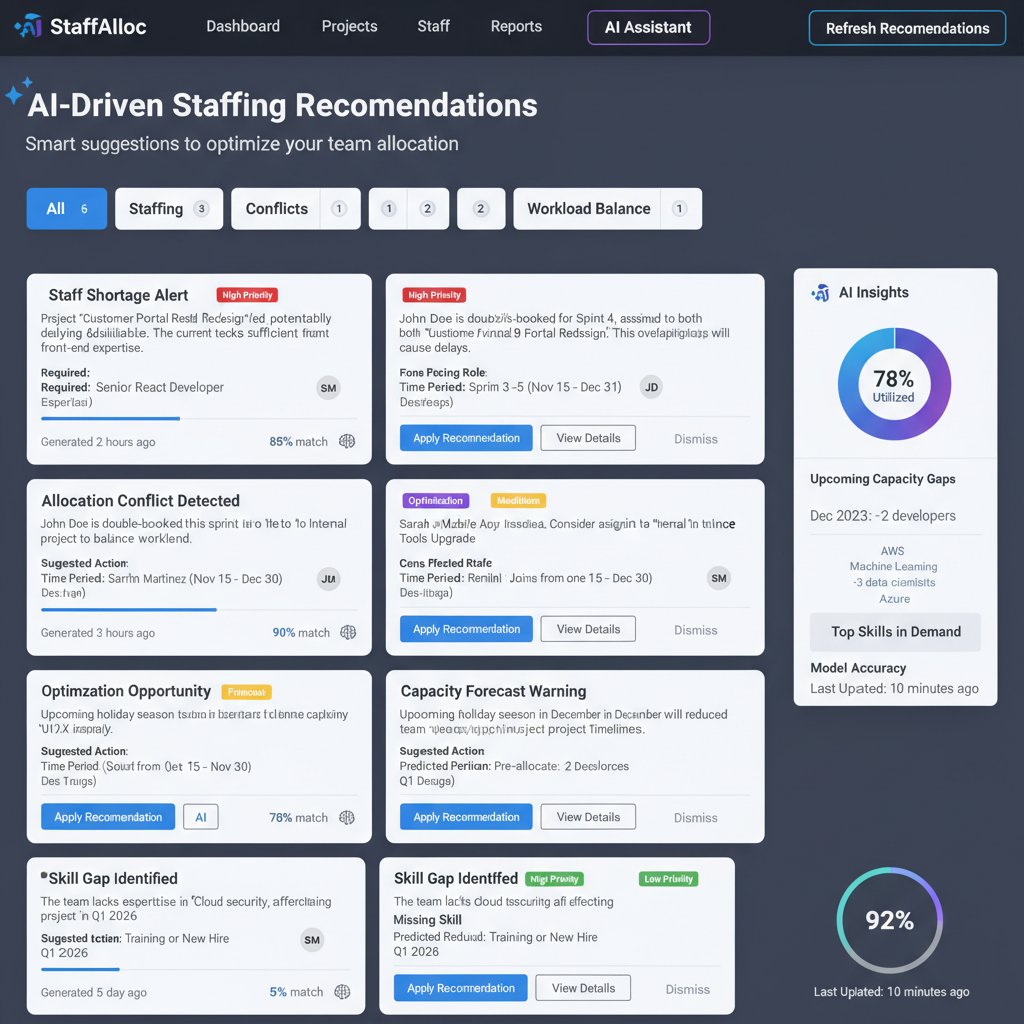

In [19]:
# Generate AI Recommendations View Image
screen_generation_prompt = """
Create an AI-powered recommendations interface for the StaffAlloc platform.

**Header:**
- StaffAlloc branding and navigation
- "AI Assistant" or "Recommendations" tab active

**Page Title:**
- "AI-Driven Staffing Recommendations" heading with AI sparkle icon
- Subtitle: "Smart suggestions to optimize your team allocation"
- "Refresh Recommendations" button on right

**Filter Tabs:**
- Horizontal tabs: All (active), Staffing, Conflicts, Forecast, Workload Balance
- Each tab shows count badge with number of recommendations

**Recommendations Feed (Main Area):**
- List of 5-6 recommendation cards, each containing:
  * Header row: Type badge + Priority indicator (High/Medium/Low with color)
  * Large recommendation title (bold): e.g., "Staff Shortage Detected"
  * Description text (2-3 sentences explaining the recommendation)
  * Context panel (light gray background box):
    - Project: "Customer Portal Redesign"
    - Required: "Senior React Developer"
    - Time Period: "Sprint 3-5 (Nov 15 - Dec 31)"
    - Suggested: "Sarah Martinez or John Doe" (with small avatars)
  * Confidence score: Progress bar showing "85% match"
  * Action buttons row:
    - "Apply Recommendation" (blue primary button)
    - "View Details" (gray outline button)
    - "Dismiss" (text link)
  * Footer: timestamp "Generated 2 hours ago" and AI model indicator

**Sample Recommendations:**
1. "Staff Shortage Alert" - Blue badge, High priority
2. "Allocation Conflict Detected" - Red badge, High priority
3. "Optimization Opportunity" - Purple badge, Medium priority
4. "Capacity Forecast Warning" - Yellow badge, Medium priority
5. "Skill Gap Identified" - Orange badge, Low priority

**Right Sidebar - AI Insights:**
- "AI Insights" panel heading with icon
- Current utilization donut chart (78% utilized)
- "Upcoming Capacity Gaps" timeline:
  * Dec 2025: -2 developers
  * Jan 2026: -3 data scientists
- "Top Skills in Demand" tag cloud or bar chart
- "Model Accuracy" indicator: 92%
- "Last Updated" timestamp

**Visual Style:**
- Modern AI/ML application aesthetic
- Cards with subtle shadows and rounded corners
- Color-coded badges for recommendation types
- Gradient accents for AI branding (blue to purple)
- Clean typography with emphasis on readability
- Professional business intelligence look
- Data visualizations (charts)
- Clear call-to-action buttons with proper hierarchy
- Icons throughout (AI sparkle, chart icons, warning icons)

Make it look like an intelligent, data-driven decision support system like Gong, Clari, or Salesforce Einstein.
"""

print(f"Using {image_model_name} for image generation...")
file_path_ai, image_url_ai = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

if file_path_ai and image_url_ai:
    print(f"✅ Generated image saved to: {file_path_ai}")
    display(Image(url=image_url_ai))
elif image_url_ai:
    print(f"❌ Image generation failed: {image_url_ai}")
else:
    print("❌ Image generation returned no result")

In [20]:
# Explain AI Recommendations View Image
image_path = file_path_ai

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <RecommendationCard> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    save_artifact(cleaned_explanation, "ai_recommendations_image_explanation.md", overwrite=True)
    print("✅ Saved explanation to artifacts/ai_recommendations_image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

--- Requesting image explanation from vision model ---


Of course. Here is a detailed, actionable breakdown for a developer to implement the AI Assistant UI.

---

### 1) Summary
This screen is an AI-powered dashboard that presents actionable staffing recommendations to help managers optimize team allocation by highlighting potential shortages, conflicts, and skill gaps.

### 2) Visual Breakdown
The UI is a two-column layout on a dark background.

*   **Global Header (Top):**
    *   **Left:** Logo (`StaffAlloc`) and icon.
    *   **Center:** Main navigation links (`Dashboard`, `Projects`, `Staff`, `Reports`). The `AI Assistant` link is visually highlighted as the active page.
    *   **Right:** A primary action button (`Refresh Recommendations`).

*   **Page Header (Below Global Header, Left Column):**
    *   **Top:** Sparkle icon next to the main title.
    *   **Title:** `<h1>` "AI-Driven Staffing Recommendations".
    *   **Subtitle:** `<h2>` or `<p>` "Smart suggestions to optimize your team allocation".

*   **Filter Bar (Below Page Header):**
    *   A row of pill-shaped filter buttons.
    *   The first filter (`All`) is styled as active.
    *   Filters include: `All`, `Staffing`, `Conflicts`, and `Workload Balance`, each with a count badge.
    *   There are smaller, circular number pills (`1`, `2`) which likely represent priority or severity sub-filters.

*   **Main Content (Two Columns):**
    *   **Left Column: Recommendations Grid**
        *   A 2-column grid of recommendation cards.
        *   **Each Card contains:**
            *   **Card Header:** Title (e.g., "Staff Shortage Alert") and one or more colored status tags (e.g., "High Priority").
            *   **Card Body:** A main description, followed by structured key-value data (e.g., `Required:`, `Suggested Action:`, `Time Period:`). Some cards include small, circular avatars with initials next to names.
            *   **Card Actions (Footer):** A row with three actions: a primary `Apply Recommendation` button, a secondary `View Details` button, and a tertiary `Dismiss` text link.
            *   **Card Meta (Bottom):** A final row containing a timestamp on the left ("Generated 2 hours ago") and a "match" percentage with a sync/refresh icon on the right.

    *   **Right Column: Insights Panel**
        *   A single, tall card titled "AI Insights" with an accompanying icon.
        *   **Donut Chart:** A large progress chart showing "78% Utilized".
        *   **Info Sections:** Titled sections for "Upcoming Capacity Gaps" and "Top Skills in Demand", each with lists of items.
        *   **Second Chart:** A smaller circular progress chart for "Model Accuracy" showing "92%".
        *   **Panel Footer:** A timestamp for when the data was last updated.

### 3) Style Details
*   **Color Palette:**
    *   **Background:** Very dark navy/charcoal (e.g., `#111827` or a similar dark blue).
    *   **Card Background:** A slightly lighter, muted blue-gray (e.g., `#1F2937`).
    *   **Primary Action:** A vibrant medium blue (e.g., `#3B82F6`) used for buttons, active states, and chart highlights.
    *   **Primary Text:** White (`#FFFFFF`) or a very light gray (`#F9FAFB`).
    *   **Secondary Text:** Muted light gray (`#9CA3AF`) for subtitles, descriptions, and meta-info.
    *   **Borders:** Subtle, slightly lighter than the card background (e.g., `#374151`).
    *   **Tag Colors (Semantic):** Red for high priority, purple for optimization, yellow for financial, and green for low priority.

*   **Typography:**
    *   **Font:** A modern, clean sans-serif (e.g., Inter, Poppins, or system UI fonts).
    *   **Page Title:** Large and bold (e.g., `36px`, `font-bold`).
    *   **Card Title:** Medium size, semi-bold (e.g., `18px`, `font-semibold`).
    *   **Body/Description:** Regular weight (e.g., `14px`, `font-normal`). Line height is generous, around `1.5`.
    *   **Labels (e.g., "Required:"):** Seem to be `font-semibold` to distinguish from their values.

*   **Spacing & Layout:**
    *   The main layout uses a grid w

✅ Saved explanation to artifacts/ai_recommendations_image_explanation.md


In [21]:
# Generate AI Recommendations Monolithic Code
image_explanation = load_artifact("ai_recommendations_image_explanation.md")


generate_ui_prompt = f"""
You are an expert frontend developer specializing in React and Tailwind CSS. Your task is to analyze the provided design image and generate a single, self-contained React component that precisely replicates the visual design.

You also have access to an image explanation generated by a previous model: 
{image_explanation}

**Requirements:**
1. Analyze the image carefully, paying attention to:
   - Layout structure, spacing, and alignment
   - Colors, typography, font sizes, and font weights
   - Border radii, shadows, and visual effects
   - All UI elements (buttons, inputs, text, icons, images, etc.)
   - Exact positioning and grouping of elements

2. Generate a single React functional component using:
   - React functional component syntax with TypeScript (optional types)
   - Tailwind CSS utility classes for ALL styling (no inline styles or separate CSS)
   - Semantic HTML elements where appropriate
   - Proper accessibility attributes (aria-labels, roles, etc.)
   - Use Heroicons or Lucide React for icons (imported from libraries)

3. Output format:
   - Export a single default component (e.g., `export default function AIRecommendationsView()`)
   - Include all necessary imports at the top
   - Use Tailwind CSS classes exclusively for styling
   - Match colors, spacing, typography, and layout as accurately as possible
   - Include placeholder text and content that matches the design
   - Ensure responsive design considerations where visible in the image

4. Code quality:
   - Clean, readable code with appropriate comments if needed
   - Proper JSX structure and formatting
   - Use semantic HTML elements
   - Include interactive states (hover, focus) where visually indicated

**Output ONLY the React component code. Do not include explanations, markdown formatting, or additional text outside of the code.**
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
    save_artifact(cleaned_code, "ai_recommendations_monolithic.jsx", overwrite=True)
    print("✅ Saved monolithic code to artifacts/ai_recommendations_monolithic.jsx")
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

--- Generating Monolithic UI Component ---


import React from 'react';
import { Cube, Sparkles, RefreshCw, BrainCircuit } from 'lucide-react';

// Type definitions for clarity
type TagType = 'High Priority' | 'Optimization' | 'Medium' | 'Financial' | 'Low Priority';

interface Recommendation {
  id: number;
  title: string;
  tags: TagType[];
  description: string;
  details: { label: string; value: string; avatars?: string[] }[];
  time: string;
  match: number;
}

const recommendationsData: Recommendation[] = [
  {
    id: 1,
    title: 'Staff Shortage Alert',
    tags: ['High Priority'],
    description: 'Project "Customer Portal Redesign" is potentially delayed. The current team lacks sufficient front-end expertise.',
    details: [
      { label: 'Required', value: 'Senior React Developer', avatars: ['SM'] },
    ],
    time: '2 hours ago',
    match: 85,
  },
  {
    id: 2,
    title: 'Staff Shortage Alert',
    tags: ['High Priority'],
    description: 'John Doe is double-booked for Sprint 4, assigned to both "Customer Portal Redesign". This overlap will cause delays.',
    details: [
        { label: 'Conflicting Role', value: 'Front-end Developer' },
        { label: 'Time Period', value: 'Sprint 3-5 (Nov 15 - Dec 31)', avatars: ['JD'] },
    ],
    time: '1 hour ago',
    match: 92,
  },
  {
    id: 3,
    title: 'Allocation Conflict Detected',
    tags: [],
    description: 'John Doe is double-booked this sprint to the internal project to balance workload.',
    details: [
      { label: 'Suggested Action', value: 'Sarrin Martinez (Nov 15 - Dec 30)', avatars: ['JIA'] },
    ],
    time: '3 hours ago',
    match: 90,
  },
  {
    id: 4,
    title: 'Allocation Conflict Detected',
    tags: ['Optimization', 'Medium'],
    description: 'Sarah\'s Mobile App knowledge. Consider assigning her to the Internal Tools Upgrade project.',
    details: [
      { label: 'Suggested Action', value: 'Reassign Sarah to Internal Tools' },
      { label: 'Time Period', value: 'Joins from one (Nov 15 - Dec 30)', avatars: ['SM'] },
    ],
    time: '5 hours ago',
    match: 88,
  },
  {
    id: 5,
    title: 'Optimization Opportunity',
    tags: ['Financial'],
    description: 'Upcoming holiday season is likely to increase capacity in the U.I./U.X. team.',
    details: [
      { label: 'Suggested Action', value: 'Loan person from Q4 project' },
      { label: 'Time Period', value: '(Oct 15 - Nov 30)', avatars: ['AI'] },
    ],
    time: '1 day ago',
    match: 76,
  },
  {
    id: 6,
    title: 'Capacity Forecast Warning',
    tags: [],
    description: 'Upcoming holiday season in December will reduced team capacity impacting project timelines.',
    details: [
      { label: 'Suggested Action', value: 'Pre-allocate: 2 Developers Q1' },
    ],
    time: '1 day ago',
    match: 72,
  },
  {
    id: 7,
    title: 'Skill Gap Identified',
    tags: [],
    description: 'The team lacks expertise in Cloud security, affecting project in Q1 2026.',
    details: [
      { label: 'Suggested Action', value: 'Training or New Hire Q1 2026', avatars: ['SM'] },
    ],
    time: '5 day ago',
    match: 5,
  },
  {
    id: 8,
    title: 'Skill Gap Identified',
    tags: ['High Priority', 'Low Priority'],
    description: 'The team lacks cloud security skills affecting Missing Skill project.',
    details: [
      { label: 'Predicted Reduction', value: 'Training or New Hire Q1 2026' },
    ],
    time: '5 day ago',
    match: 65,
  },
];

const DonutChart = ({ percentage, label, size = 'large' }: { percentage: number, label: string, size?: 'large' | 'small' }) => {
    const isLarge = size === 'large';
    const chartSize = isLarge ? 160 : 100;
    const strokeWidth = isLarge ? 20 : 12;
    const radius = (chartSize - strokeWidth) / 2;
    const circumference = 2 * Math.PI * radius;
    const offset = circumference - (percentage / 100) * circumference;

    const gradientId = `gradient-${label.replace(/\s+/g, '-')}`;
    const colorStops = percentage > 85
        ? { stop1: '#3B82F6', stop2: '#60A5F

✅ Saved monolithic code to artifacts/ai_recommendations_monolithic.jsx


In [22]:
# Refactor AI Recommendations Code into Components
refactor_ui_prompt = f"""
You are a senior frontend developer specializing in React and clean code architecture. Your task is to refactor the provided monolithic React component into a well-structured, component-based architecture using best practices.

**Context - Monolithic Component Code:**
{cleaned_code}

**Requirements:**
1. Analyze the monolithic component and identify logical groupings of UI elements that can be extracted into reusable sub-components.

2. Create smaller, focused components following the Single Responsibility Principle:
   - Extract repeated UI patterns (e.g., recommendation cards, badges, charts) into reusable components
   - Separate layout sections (e.g., header, tabs, feed, sidebar) into dedicated components
   - Create styled components for cards, badges, progress bars, charts, etc.
   - Extract icon components if they are defined inline or can be reused

3. Component structure:
   - Each sub-component should have a clear, descriptive name (e.g., `<AIHeader>`, `<RecommendationCard>`, `<PriorityBadge>`, `<ConfidenceBar>`)
   - Use React functional component syntax
   - Maintain all Tailwind CSS styling from the original code
   - Keep components in the same file (no separate imports needed)
   - Ensure proper prop types/parameters if components need customization
   - Add TypeScript interfaces for props where appropriate

4. Main component refactoring:
   - The main component should be simplified and use the extracted sub-components
   - Maintain the exact same visual output and styling as the original
   - Use clear, semantic component names
   - Keep the same export structure (export default)

5. Code quality standards:
   - Clean, readable code with clear component boundaries
   - Proper JSX formatting and indentation
   - Comments where necessary to explain component purpose
   - Follow React best practices for component composition
   - Ensure all components are well-organized (helper components first, main component last)

**Output format:**
Output ONLY the complete refactored React code with all components defined. Include all necessary component definitions before the main component, and then the main component that uses them. Do not include explanations, markdown formatting, or additional text outside of the code.

The refactored code should demonstrate professional React component architecture while maintaining 100% visual fidelity to the original monolithic component.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    save_artifact(cleaned_refactored_code, "ai_recommendations_refactored.jsx", overwrite=True)
    print("✅ Saved refactored code to artifacts/ai_recommendations_refactored.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


import React from 'react';
import { Cube, Sparkles, RefreshCw, BrainCircuit } from 'lucide-react';

// --- TYPE DEFINITIONS ---
type TagType = 'High Priority' | 'Optimization' | 'Medium' | 'Financial' | 'Low Priority';

interface RecommendationDetail {
  label: string;
  value: string;
  avatars?: string[];
}

interface Recommendation {
  id: number;
  title: string;
  tags: TagType[];
  description:string;
  details: RecommendationDetail[];
  time: string;
  match: number;
}

interface Filter {
    name: string;
    count: number;
    isIcon?: boolean;
}

// --- DATA ---
const recommendationsData: Recommendation[] = [
  { id: 1, title: 'Staff Shortage Alert', tags: ['High Priority'], description: 'Project "Customer Portal Redesign" is potentially delayed. The current team lacks sufficient front-end expertise.', details: [{ label: 'Required', value: 'Senior React Developer', avatars: ['SM'] }], time: '2 hours ago', match: 85 },
  { id: 2, title: 'Staff Shortage Alert', tags: ['High Priority'], description: 'John Doe is double-booked for Sprint 4, assigned to both "Customer Portal Redesign". This overlap will cause delays.', details: [{ label: 'Conflicting Role', value: 'Front-end Developer' }, { label: 'Time Period', value: 'Sprint 3-5 (Nov 15 - Dec 31)', avatars: ['JD'] }], time: '1 hour ago', match: 92 },
  { id: 3, title: 'Allocation Conflict Detected', tags: [], description: 'John Doe is double-booked this sprint to the internal project to balance workload.', details: [{ label: 'Suggested Action', value: 'Sarrin Martinez (Nov 15 - Dec 30)', avatars: ['JIA'] }], time: '3 hours ago', match: 90 },
  { id: 4, title: 'Allocation Conflict Detected', tags: ['Optimization', 'Medium'], description: 'Sarah\'s Mobile App knowledge. Consider assigning her to the Internal Tools Upgrade project.', details: [{ label: 'Suggested Action', value: 'Reassign Sarah to Internal Tools' }, { label: 'Time Period', value: 'Joins from one (Nov 15 - Dec 30)', avatars: ['SM'] }], time: '5 hours ago', match: 88 },
  { id: 5, title: 'Optimization Opportunity', tags: ['Financial'], description: 'Upcoming holiday season is likely to increase capacity in the U.I./U.X. team.', details: [{ label: 'Suggested Action', value: 'Loan person from Q4 project' }, { label: 'Time Period', value: '(Oct 15 - Nov 30)', avatars: ['AI'] }], time: '1 day ago', match: 76 },
  { id: 6, title: 'Capacity Forecast Warning', tags: [], description: 'Upcoming holiday season in December will reduced team capacity impacting project timelines.', details: [{ label: 'Suggested Action', value: 'Pre-allocate: 2 Developers Q1' }], time: '1 day ago', match: 72 },
  { id: 7, title: 'Skill Gap Identified', tags: [], description: 'The team lacks expertise in Cloud security, affecting project in Q1 2026.', details: [{ label: 'Suggested Action', value: 'Training or New Hire Q1 2026', avatars: ['SM'] }], time: '5 day ago', match: 5 },
  { id: 8, title: 'Skill Gap Identified', tags: ['High Priority', 'Low Priority'], description: 'The team lacks cloud security skills affecting Missing Skill project.', details: [{ label: 'Predicted Reduction', value: 'Training or New Hire Q1 2026' }], time: '5 day ago', match: 65 },
];

const filtersData: Filter[] = [
    { name: 'All', count: 6 }, { name: 'Staffing', count: 3 }, { name: 'Conflicts', count: 1 },
    { name: 'Priority1', count: 1, isIcon: true }, { name: 'Priority2', count: 2, isIcon: true },
    { name: 'Workload Balance', count: 1 },
];

// --- ATOMIC & REUSABLE COMPONENTS ---

const DonutChart = ({ percentage, label, size = 'large' }: { percentage: number; label: string; size?: 'large' | 'small' }) => {
    const isLarge = size === 'large';
    const chartSize = isLarge ? 160 : 100;
    const strokeWidth = isLarge ? 20 : 12;
    const radius = (chartSize - strokeWidth) / 2;
    const circumference = 2 * Math.PI * radius;
    const offset = circumference - (percentage / 100) * circumference;
    const gradientId = `gradient-${label.replace(/\s+/g,

✅ Saved refactored code to artifacts/ai_recommendations_refactored.jsx


---

# Summary

## Views Generated

This notebook generates **5 complete views** for the StaffAlloc application:

1. **Dashboard** - Main overview with metrics, quick actions, and AI recommendations
2. **Projects Management** - Table-based project listing with filters and search
3. **Allocations Calendar** - Gantt-style resource allocation calendar
4. **Employees Management** - Card-based employee directory with team stats
5. **AI Recommendations** - AI-powered staffing recommendations feed

## Artifacts Created

For each view, the following artifacts are saved to `/artifacts/`:

- `{view}_image_explanation.md` - Detailed UI analysis
- `{view}_monolithic.jsx` - Single-file React component
- `{view}_refactored.jsx` - Refactored with sub-components

## File Naming

- Dashboard: `dashboard_*`
- Projects: `projects_*`
- Allocations: `allocations_*`
- Employees: `employees_*`
- AI Recommendations: `ai_recommendations_*`

## Next Steps

1. Run all cells sequentially to generate all views
2. Review generated images and code in the artifacts directory
3. Integrate the refactored components into your React application
4. Connect to the backend API endpoints (from Phase 3)
5. Add state management (Redux/Zustand) for data handling
6. Implement routing (React Router) between views

## Tech Stack

- **Framework**: React with TypeScript
- **Styling**: Tailwind CSS
- **Icons**: Heroicons or Lucide React
- **Components**: Functional components with hooks